In [1]:
# !pip install fast-ml missingno

### Import libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Features summary
from fast_ml import eda
from fast_ml.utilities import display_all

# Missing data visualisation
import missingno as msno

In [3]:
# Read the training set
df = pd.read_csv('./dataset/data_mining_water_table.csv')

---
# <ins>Data Understanding and Analysis</ins>

## Custom Function

In [4]:
def countplot_w_percentage(df_in, fig_size, x_value, hue_value, title, legend_position):
    df_temp = df_in.copy()
    
    plt.subplots(figsize=fig_size)
    target_countplot = sns.countplot(data=df_temp, x=x_value, hue=hue_value)

    for patch in target_countplot.patches:
        percentage = '{:.2f}%'.format(100 * patch.get_height() / df.shape[0])
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() + patch.get_height() * 0.01
        target_countplot.annotate(percentage, (x, y), ha='center')

    plt.legend(loc=legend_position)
    plt.title(title)
    plt.show()

## 1. Dataset Overview

In [5]:
df.shape

(59400, 41)

In [6]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
summary_df = eda.df_info(df)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,int64,Numerical,59400,"[69572, 8776, 34310, 67743, 19728, 9944, 19816...",0,0.0
amount_tsh,float64,Numerical,98,"[6000.0, 0.0, 25.0, 20.0, 200.0, 500.0, 50.0, ...",0,0.0
date_recorded,object,Categorical,356,"[2011-03-14, 2013-03-06, 2013-02-25, 2013-01-2...",0,0.0
funder,object,Categorical,1897,"[Roman, Grumeti, Lottery Club, Unicef, Action ...",3635,6.119529
gps_height,int64,Numerical,2428,"[1390, 1399, 686, 263, 0, 62, 1062, 1368, 1645...",0,0.0
installer,object,Categorical,2145,"[Roman, GRUMETI, World vision, UNICEF, Artisan...",3655,6.153199
longitude,float64,Numerical,57516,"[34.93809275, 34.6987661, 37.46066446, 38.4861...",0,0.0
latitude,float64,Numerical,57517,"[-9.85632177, -2.14746569, -3.82132853, -11.15...",0,0.0
wpt_name,object,Categorical,37400,"[none, Zahanati, Kwa Mahundi, Zahanati Ya Nany...",0,0.0
num_private,int64,Numerical,65,"[0, 39, 5, 45, 6, 3, 698, 32, 15, 7]",0,0.0


### 1.1 Initial observation on missing data

In [8]:
# Missing Data in descending order
df.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
payment                      0
waterpoint_type_group        0
extraction_type_group        0
extraction_type_class        0
waterpoint_type              0
management                   0
management_group             0
source_class                 0
source_type                  0
water_quality                0
quality_group                0
extraction_type              0
quantity                     0
quantity_group               0
source                       0
payment_type                 0
id                           0
construction_year            0
basin                        0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
region  

### 1.2 Target labels

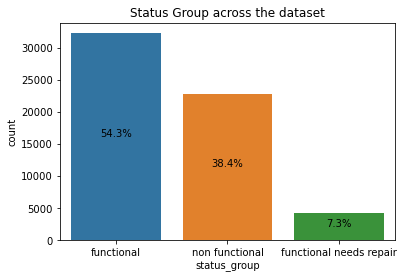

In [9]:
# Imbalanced dataset
target_countplot = sns.countplot(data=df, x='status_group')
total = df.shape[0]

for patch in target_countplot.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() / 2 
    target_countplot.annotate(percentage, (x, y), ha='center')
    
plt.title('Status Group across the dataset')
plt.show()

### 1.3 Duplicate Data

In [10]:
# Check for duplicate rows
df[df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


## 2. Feature Analysis

### 2.1 amount_tsh
- Description: Total static head (amount water available to waterpoint)
- Static head is the height that water has to travel as it moves through your discharge pipe.

In [11]:
# Display the feature's descriptive statistic
df['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [12]:
print('Overall data percentage with amount_tsh of 0: {:.2f}%'.format(df.loc[df['amount_tsh'] == 0].shape[0] / df.shape[0] * 100))

# Find out the number of missing pump excluding the non-functional pump
total_zero_amount_tsh = df.loc[(df['amount_tsh'] == 0) , 'status_group'].count()
non_functional_zero_amount_tsh = df.loc[(df['amount_tsh'] == 0) & (df['status_group'] == 'non functional'), 'status_group'].count()

print('Functional & Need Repair pumps with amount_tsh of 0:', total_zero_amount_tsh - non_functional_zero_amount_tsh)

Overall data percentage with amount_tsh of 0: 70.10%
Functional & Need Repair pumps with amount_tsh of 0: 22754


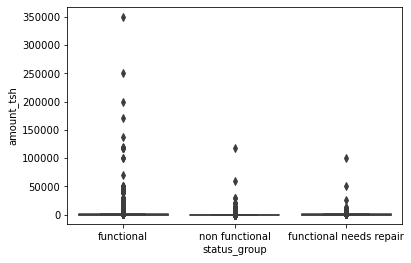

In [13]:
sns.boxplot(data=df, x='status_group', y='amount_tsh')
plt.show()

In [14]:
# Code reference from https://stackoverflow.com/questions/15963895/how-to-check-if-a-double-value-has-no-decimal-part

# Since the feature is floating type let's displays the row which contains decimal point
df.loc[df['amount_tsh'] % 1 != 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
4086,51766,0.20,2013-11-02,Government Of Tanzania,952,Central Government,37.838427,-4.154839,Barazani,0,...,coloured,colored,insufficient,insufficient,river,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
11140,18387,0.20,2013-01-17,Tcrs,852,TCRS,35.218314,-5.881864,Kwa Afisa Kata,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
15519,69930,0.20,2013-11-02,Government Of Tanzania,953,W.D. and I.D.,37.843340,-4.151953,Zanati,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
49378,62393,0.25,2013-12-03,Ces(gmbh),685,DWE,37.357509,-3.586230,Kwa Samweli Kigogo,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


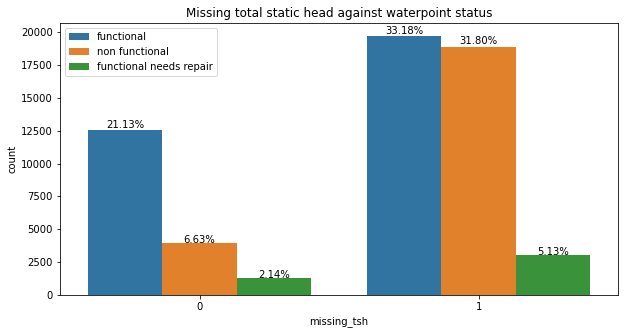

In [15]:
# Since 70.4% of the data is 0, imputation would introduce bias, therefore we can feature engineer a binary feature
# that indicate 1 if the amount_tsh = 0 and 0 if != 0. 1 indicates missing tsh, 0 indicates present of tsh.

# Visualisation of binary tsh against waterpoint status
df_temp = df[['amount_tsh', 'status_group']].copy()
df_temp['amount_tsh'] = df_temp['amount_tsh'].astype(int)
df_temp['missing_tsh'] = np.where(df_temp['amount_tsh'] == 0, 1, 0)

countplot_w_percentage(df_temp, (10, 5), 'missing_tsh', 'status_group', 
                       'Missing total static head against waterpoint status', 'upper left')

#### Observation:
- 70% contains 0, approximate 22754 of amount_tsh is 0 althought the pump is still functional.
- Extreme outliers found in the features, resulting in a poor box-plot representation.
- Non-missing of amount_tsh are more likely to have a functional waterpoint as compared to amount_tsh with values.

#### Notes:
- As a waterpoint cannot operate with a value of 0 for amount tsh, it is reasonable to assume that missing values are encoded as 0 but imputation of huge numbers of missing data would result in bias. Another possibility would be that the waterpipe is closed circulation systems according to https://impeller.net/encyclopedia/total-static-head/
- Perform feature engineering to represent the binary total static head, the engineered feature would be a good predictor of waterpoint status.
- Feauture outliers handling are required before performing feature normalization if used without feature engineering.


### 2.2 date_recorded
- Description: The date the row was entered

In [16]:
df['date_recorded'].describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

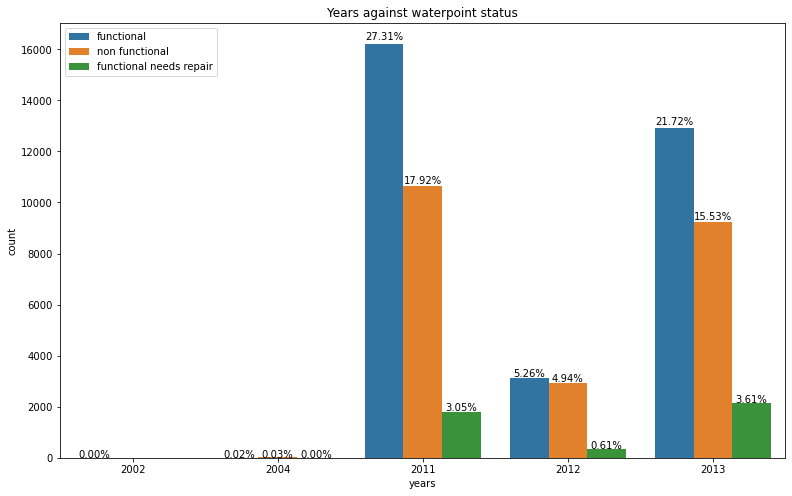

In [17]:
# Since date_recorded is a combination of year, month dayy, we can visualise each of them against the target values

# Visualisation of year against waterpoint status
df_temp = df[['date_recorded', 'status_group']].copy()
df_temp['years'] = pd.DatetimeIndex(df_temp['date_recorded']).year

countplot_w_percentage(df_temp, (13, 8), 'years', 'status_group', 
                       'Years against waterpoint status', 'upper left')

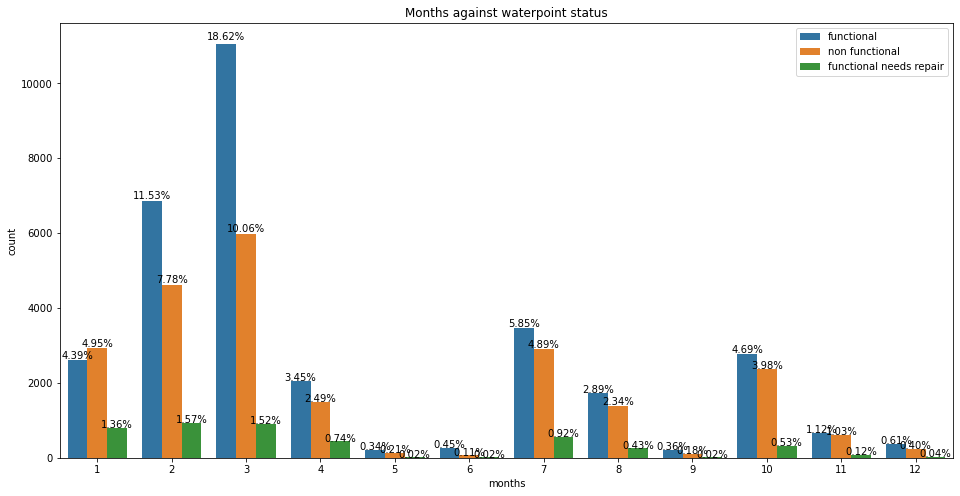

In [18]:
# Visualisation of month against waterpoint status
df_temp = df[['date_recorded', 'status_group']].copy()
df_temp['months'] = pd.DatetimeIndex(df_temp['date_recorded']).month

countplot_w_percentage(df_temp, (16, 8), 'months', 'status_group', 
                       'Months against waterpoint status', 'upper right')

#### Observation:
- date_recorded is a combination of year-month-day.
- Most of the records are recorded between 2011 to 2013.
- Waterpoint pump are very likely to be functional on February & March.
- recorded month does not seem to be a good predictor of waterpoint_status, given that the distributions of 2011 to 2013 are fairly similar.

#### Notes:
- Feature engineering: Create year_month_recorded feature to reduce the cardinality of the feature.

### 2.3 funder
- Description: Who funded the well

In [19]:
df['funder'].describe()

count                      55765
unique                      1897
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object

In [20]:
# Check for spelling mistakes or possible empty values
print(list(df['funder'].sort_values().unique()))

['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia', 'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul', 'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w', 'Adra', 'Af', 'Afdp', 'Afric', 'Africa', 'Africa 2000 Network/undp', 'Africa Amini Alama', 'Africa Project Ev Germany', 'African', 'African 2000 Network', 'African Barrick Gold', 'African Development Bank', 'African Development Foundation', 'African Muslim Agency', 'African Realief Committe Of Ku', 'African Reflections Foundation', 'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli', 'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc', 'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene Mwaikek', 'Amref', 'Amrefe', 'Anglican Church', 'Angrikana', 'Anjuman E Seifee', 'Answeer Muslim Grou', 'Apm', 'Apm[af

In [21]:
# Possible missing values' representation

print('Total Nan in Funder column:', df['funder'].isna().sum())
print('Total 0 in funder column:', len(df.loc[df['funder'] == '0']))
print('Total None in funder column:', len(df.loc[df['funder'] == 'None']))

Total Nan in Funder column: 3635
Total 0 in funder column: 777
Total None in funder column: 2


In [22]:
df['funder'].value_counts(normalize=True, dropna=False).head(20)

Government Of Tanzania    0.152929
NaN                       0.061195
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
Kkkt                      0.021667
World Vision              0.020976
Unicef                    0.017795
Tasaf                     0.014764
District Council          0.014192
Dhv                       0.013956
Private Individual        0.013906
Dwsp                      0.013653
0                         0.013081
Norad                     0.012879
Germany Republi           0.010269
Tcrs                      0.010135
Ministry Of Water         0.009933
Water                     0.009815
Name: funder, dtype: float64

#### Observation:
- Funder consist of 1897 unique values.
- Funder column contains 3635 of NaN, 777 of 0 and 2 of None; it may be assumed that these representations imply missing data.
- 'Government of Tanzania' appears most often among funders with approximate 14%, followed by 'Nan'.
- Funder columns contain spelling mistakes; etc. Afric, Bukwang Church Saint, commu, churc, danida...

#### Notes:
- High cardinality present in the Funder column, necessitating extra preprocessing steps such as binning, feature combination before ordinal encoding steps.
- Perform imputation, binning or feature combination, feature encoding.

### 2.4 gps_height
- Description: Altitude of the well

In [23]:
df['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [24]:
print('Percentage of 0 as gps_height: {:.2f}%'.format(df.loc[df['gps_height'] == 0].shape[0] / df.shape[0] * 100))
print('Percentage of negative values as gps_height: {:.2f}%'.format(df.loc[df['gps_height'] < 0].shape[0] / df.shape[0] * 100))

Percentage of 0 as gps_height: 34.41%
Percentage of negative values as gps_height: 2.52%


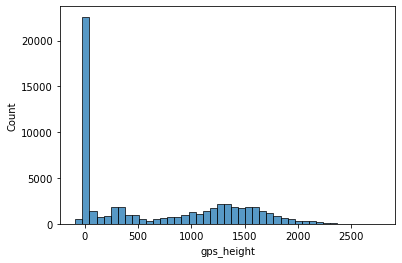

In [25]:
sns.histplot(data=df, x='gps_height')
plt.show()

In [26]:
# Since the feature is floating type let's displays the row which contains decimal point
df.loc[df['gps_height'] % 1 != 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


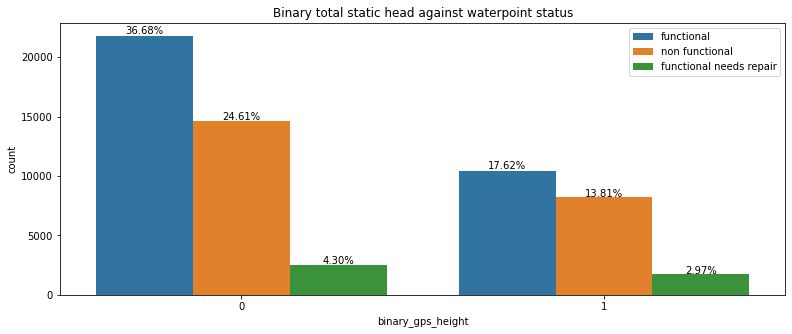

In [27]:
df_temp = df[['gps_height', 'status_group']].copy()
df_temp['gps_height'] = df_temp['gps_height'].astype(int)
df_temp['binary_gps_height'] = np.where(df_temp['gps_height'] == 0, 1, 0)

countplot_w_percentage(df_temp, (13, 5), 'binary_gps_height', 'status_group', 
                       'Binary total static head against waterpoint status', 'upper right')

#### Observation
- gps_height contains 34% values as 0. It is impossible for the altitude of the well to be 0 and the waterpoint will still be functional; it may be assume that missing values are encoded as 0 similar to amount_tsh.
- gps_height contains 2% values as negative which are considered as impossible values.
- There isn't any significant difference in converting the representation into binary form.

#### Notes:
- Convert datatype to int as there doesn't exist a row with decimal point.
- Perform imputation on 0 and negative values.

### 2.5 installer
- Description: Organization that installed the well

In [28]:
df['installer'].describe()

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object

In [29]:
# Possible missing values' representation
print('Total NaN in installer column:', df['installer'].isna().sum())
print('Total 0 in installer column:', len(df.loc[df['installer'] == '0']))
print('Total - in funder column:', len(df.loc[df['installer'] == '-']))

Total NaN in installer column: 3655
Total 0 in installer column: 777
Total - in funder column: 3


In [30]:
print(df['installer'].value_counts(normalize=True, dropna=False).head(20))

DWE                   0.292963
NaN                   0.061532
Government            0.030724
RWE                   0.020303
Commu                 0.017845
DANIDA                0.017677
KKKT                  0.015118
Hesawa                0.014141
0                     0.013081
TCRS                  0.011902
Central government    0.010471
CES                   0.010269
Community             0.009310
DANID                 0.009293
District Council      0.009276
HESAWA                0.009074
LGA                   0.006869
World vision          0.006869
WEDECO                0.006684
TASAF                 0.006667
Name: installer, dtype: float64


In [31]:
print(list(df['installer'].sort_values().unique()))

['-', '0', 'A.D.B', 'AAR', 'ABASIA', 'ABD', 'ABDALA', 'ABDUL', 'AC', 'ACORD', 'ACRA', 'ACT', 'ACT MARA', 'ACTION AID', 'ACTIVE TANK CO', 'ACTIVE TANK CO LTD', 'AD', 'ADAP', 'ADB', 'ADP', 'ADP Busangi', 'ADRA', 'ADRA /Government', 'ADRA/Government', 'AF', 'AFRICA', 'AFRICA MUSLIM', 'AFRICAN DEVELOPMENT FOUNDATION', 'AFRICAN REFLECTIONS FOUNDATION', 'AGRICAN', 'AI', 'AIC', 'AIC KI', 'AICT', 'AIMGOLD', 'AIXOS', 'ALIA', 'ALLYS', 'AMP Contract', 'AMP Contracts', 'AMP contractor', 'AMREF', 'ANGLI', 'ANGLIKANA CHURCH', 'ANGRIKANA', 'ANSWAR', 'APM', 'AQAL', 'AQUA BLUES ANGELS', 'AQUA WEL', 'AQUA Wat', 'AQUA Wel', 'AQUARMAN DRILLERS', 'ASDP', 'ATIGH BUILDINGS', 'AUSTRALIA', 'AUWASA', 'Aartisa', 'Abdallah Ally Wazir', 'Accra', 'Action Aid', 'Action Contre La Faim', 'Action Contre la Faim', 'Active KMK', 'Active MKM', 'Adam', 'Adam Kea', 'Adam mualuaka', 'Adra', 'Adra /Community', 'Adra/ Community', 'Adra/Community', 'Adrs', 'Af', 'Africa', 'Africa Amini Alama', 'Africa Islamic Agency Tanzania', 

#### Observation:
- Installer consist of 2145 unique values.
- Installer column contains 3655 of Nan, 777 of 0 and 3 of '-'; similar to funder these represantions imply missing data.
- 'DWE' appears most often among funders with approximate 29%, followed by 'Nan' similar to funder column.
- Similar to funder column, installer contains spelling mistakes.

#### Notes:
- While there are more unique entries in the installer column than in the funder column, both columns have overlapping values.
- Installer column comprises similar issues such as high cardinality, various representations of missing values and spelling mistakes as funder; hence the same pre-processing approach may be used for both features.
- Perform imputation, binning or feature combination, feature encoding.

### 2.6 latitude & longitude
- Description: GPS coordinate

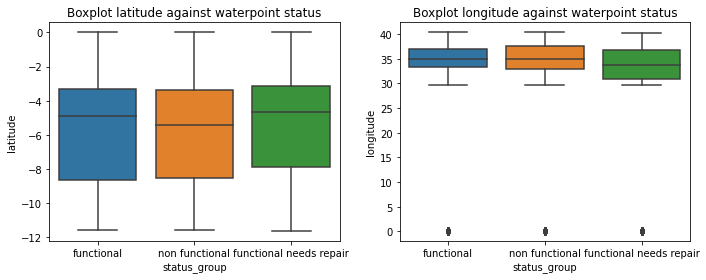

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, x='status_group', y='latitude', ax=ax[0])
sns.boxplot(data=df, x='status_group', y='longitude', ax=ax[1])
ax[0].set_title('Boxplot latitude against waterpoint status')
ax[1].set_title('Boxplot longitude against waterpoint status')
plt.tight_layout()
plt.show()

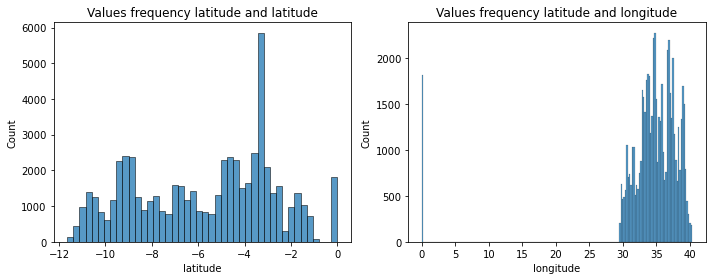

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=df, x='latitude', ax=ax[0])
sns.histplot(data=df, x='longitude', ax=ax[1])
ax[0].set_title('Values frequency latitude and latitude')
ax[1].set_title('Values frequency latitude and longitude')
plt.tight_layout()
plt.show()

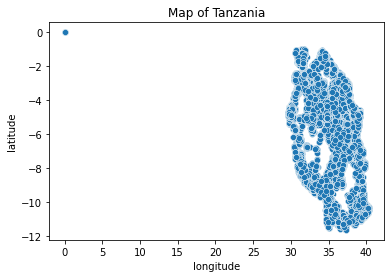

In [34]:
sns.scatterplot(data=df, x='longitude', y='latitude')
plt.title('Map of Tanzania')
plt.show()

In [35]:
# Missing values of longitude and latitude
df.loc[(df['longitude'] == 0) & (df['latitude'] == -2.000000e-08), ['longitude', 'latitude']]

,longitude,latitude
21,0.0,-2.000000e-08
53,0.0,-2.000000e-08
168,0.0,-2.000000e-08
177,0.0,-2.000000e-08
253,0.0,-2.000000e-08
...,...,...
59189,0.0,-2.000000e-08
59208,0.0,-2.000000e-08
59295,0.0,-2.000000e-08
59324,0.0,-2.000000e-08


#### Observation:
- Missing values in longitude are encoded as 0.
- Missing values in latitude are encoded as -2.000000e-08.
- Longitude and latitude contains 1812 rows of missing values.

#### Notes:
- Perform imputation for latitude & longitude.

### 2.7 wpt_name
- Description: Name of the waterpoint if there is one

In [36]:
# Display the length of unique values
print('Total unique values in wpt_name: ', len(df['wpt_name'].unique()), '\n')

# Check for spelling mistakes or possible empty values
print(list(df['funder'].sort_values().unique()))

Total unique values in wpt_name:  37400 

['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia', 'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul', 'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w', 'Adra', 'Af', 'Afdp', 'Afric', 'Africa', 'Africa 2000 Network/undp', 'Africa Amini Alama', 'Africa Project Ev Germany', 'African', 'African 2000 Network', 'African Barrick Gold', 'African Development Bank', 'African Development Foundation', 'African Muslim Agency', 'African Realief Committe Of Ku', 'African Reflections Foundation', 'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli', 'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc', 'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene Mwaikek', 'Amref', 'Amrefe', 'Anglican Church', 'Angrikana', 'Anjuman E Seif

In [37]:
print('Total None in wpt_name:', len(df.loc[df['wpt_name'] == 'none']))

Total None in wpt_name: 3563


In [38]:
df['wpt_name'].value_counts(normalize=True, dropna=False).head(20)

none               0.059983
Shuleni            0.029428
Zahanati           0.013973
Msikitini          0.009007
Kanisani           0.005438
Bombani            0.004562
Sokoni             0.004377
Ofisini            0.004276
School             0.003502
Shule Ya Msingi    0.003350
Shule              0.002559
Sekondari          0.002458
Muungano           0.002239
Mkombozi           0.001869
Madukani           0.001751
Mbugani            0.001582
Hospital           0.001582
Upendo             0.001566
Kituo Cha Afya     0.001515
Mkuyuni            0.001481
Name: wpt_name, dtype: float64

#### Observation:
- wpt_name contains 37400 unique values.
- 'None' appers most often among wpt_name with approximate 6% which assumes to be missing values.

#### Notes:
- wpt_name contains very high cardinaly and there isn't a valid name which occurs more frequently than others.
- Given that the most common value for this feature is 'None' which is invalid and there is no presence of a single value that occurs more often than the others, it is reasonable to drop this feature.

### 2.8 num_private
- Description: None

In [39]:
df['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [40]:
print('Overall data percentage with num_private of 0: {:.2f}%'.format(df.loc[df['num_private'] == 0].shape[0] / df.shape[0] * 100))

Overall data percentage with num_private of 0: 98.73%


#### Observation: 
- Approximate 99% of the data is 0.

#### Notes:
- This feautures hold very little information, it is reasonable to drop this feature.

### 2.9 basin
- Description: Geographic water basin

In [41]:
df['basin'].describe()

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object

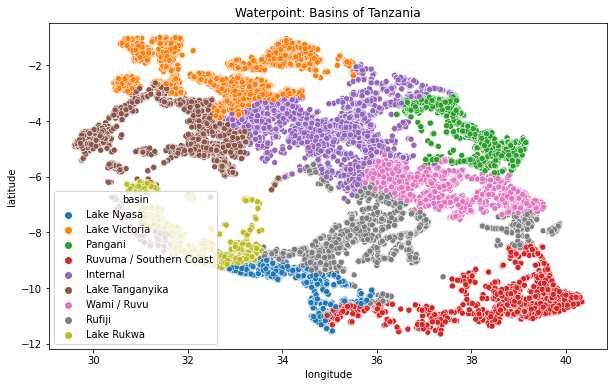

In [42]:
df_temp = df[['longitude', 'latitude', 'basin', 'status_group']].copy()

# Remove the missing values which obscure the visualisation of scatterplot of longitude & latitude
df_temp['latitude'].replace(-2.000000e-08, np.nan, inplace=True)
df_temp['longitude'].replace(0, np.nan, inplace=True)

plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_temp, x='longitude', y='latitude', hue='basin')
plt.title('Waterpoint: Basins of Tanzania')
plt.show()

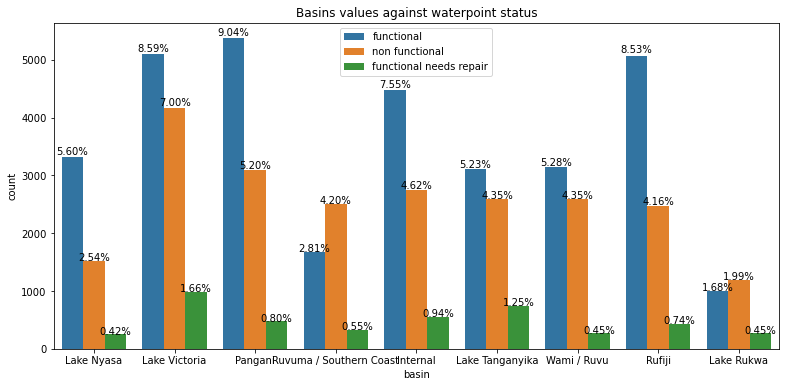

In [43]:
countplot_w_percentage(df, (13, 6), 'basin', 'status_group', 
                       'Basins values against waterpoint status', 'upper center')

#### Observation:
- Non-functional pump in Lake Rukwa is more often to occur than functional

### 2.10 region / region_code
- Description: Geographic location / geographic location (coded)

In [44]:
print(df['region'].describe())
print('Length of unique value for region_code:', len(df['region_code'].unique()))

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object
Length of unique value for region_code: 27


In [45]:
df['region'].value_counts(normalize=True, dropna=False)

Iringa           0.089125
Shinyanga        0.083872
Mbeya            0.078098
Kilimanjaro      0.073721
Morogoro         0.067441
Arusha           0.056397
Kagera           0.055825
Mwanza           0.052222
Kigoma           0.047407
Ruvuma           0.044444
Pwani            0.044360
Tanga            0.042879
Dodoma           0.037054
Singida          0.035236
Mara             0.033148
Tabora           0.032980
Rukwa            0.030438
Mtwara           0.029125
Manyara          0.026650
Lindi            0.026027
Dar es Salaam    0.013552
Name: region, dtype: float64

In [46]:
# Display the combination of basin, region, region_district with respect to its count in the 'id' column
df.groupby(['basin', 'region', 'region_code'])['id'].count().reset_index()

,basin,region,region_code,id
0,Internal,Arusha,2,983
1,Internal,Arusha,24,326
2,Internal,Dodoma,1,827
3,Internal,Kilimanjaro,3,169
4,Internal,Manyara,21,1206
5,Internal,Shinyanga,17,1641
6,Internal,Singida,13,1992
7,Internal,Tabora,14,641
8,Lake Nyasa,Iringa,11,1582
9,Lake Nyasa,Mbeya,12,2430


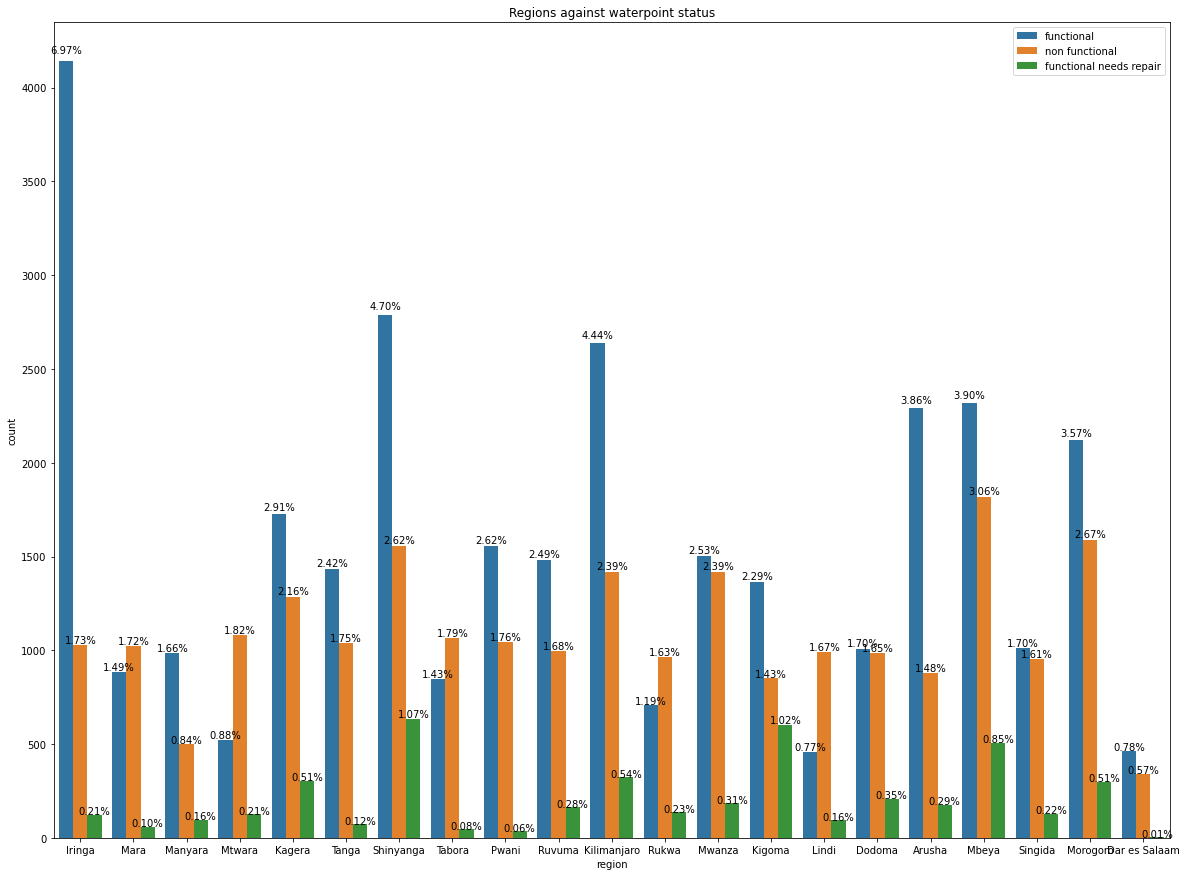

In [47]:
countplot_w_percentage(df, (20, 15), 'region', 'status_group', 'Regions against waterpoint status', 'upper right')

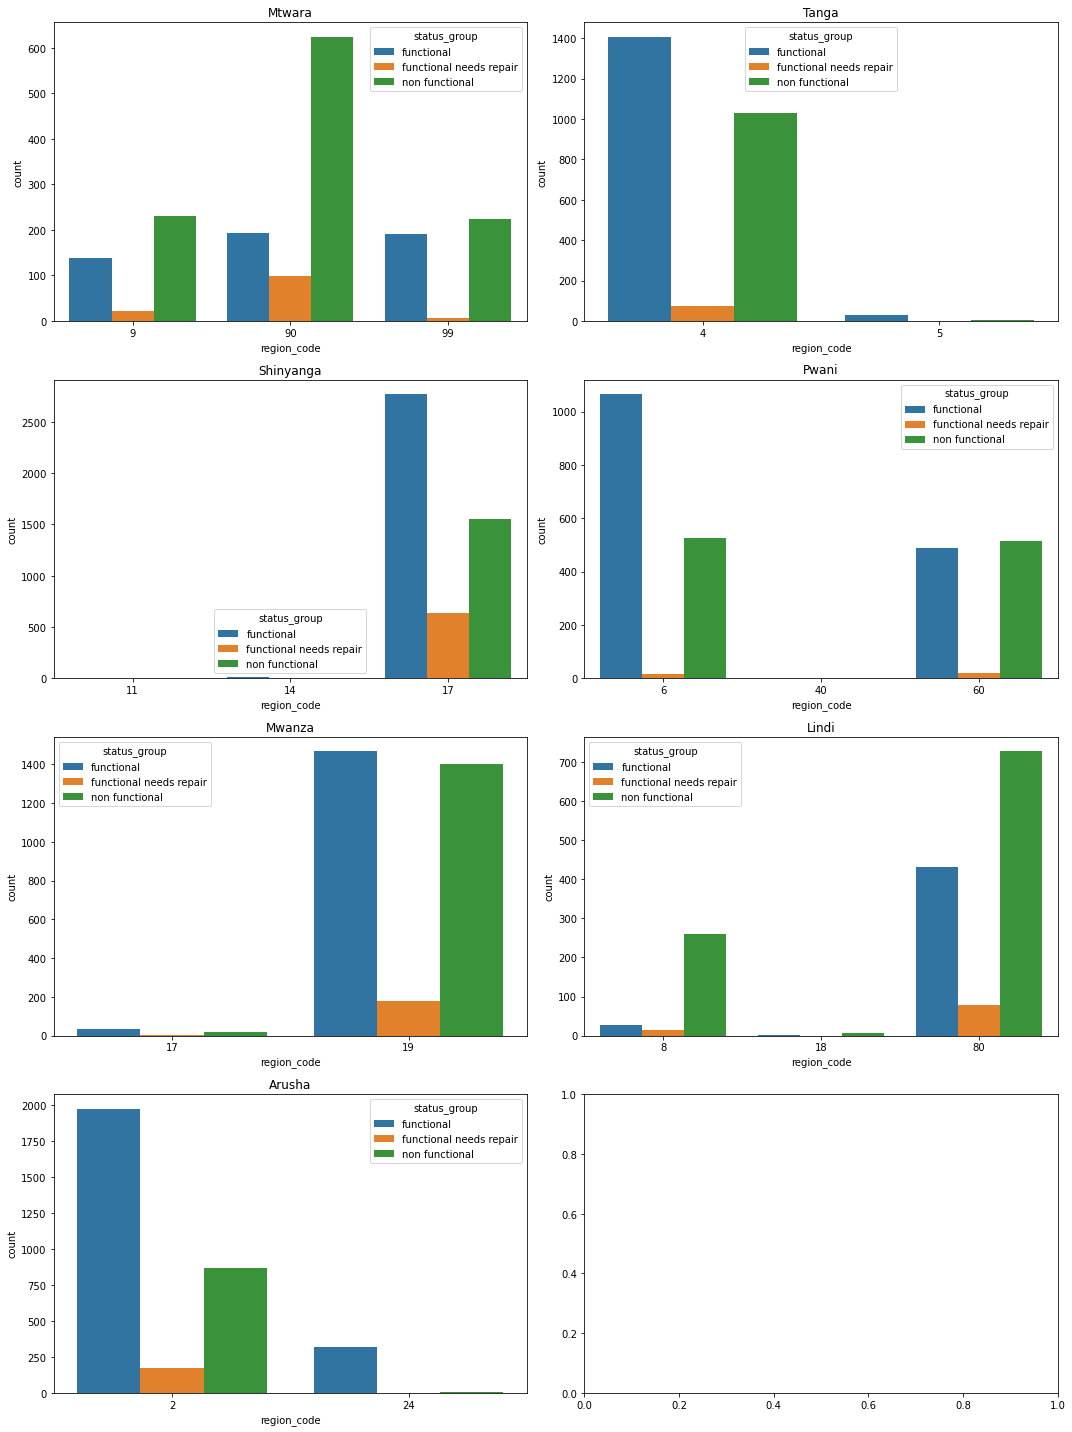

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
ax = ax.ravel()
count = 0

for region in df['region'].unique():
    if df.loc[df['region'] == region, 'region_code'].unique().shape[0] > 1:
        df_temp = df.loc[df['region'] == region].sort_values(by='status_group')
        sns.countplot(data=df_temp, x='region_code', hue='status_group', ax=ax[count])
        ax[count].set_title(region)
        count += 1
        
plt.tight_layout()
plt.show()

#### Observation:
- region has 21 unique values while region code has 27.
- Some region have high proportion of functional pump as compared to other regions. e.g. Iringa.
- Each region may have multiple region code.
- There exist some notable separation between functional & non-functional pumps in the Mtwara region_code.
- region_code provide more information than region therefore best to use region.

#### Notes: 
- There exist a hierachical relationship between basin, region & region code.
- Granularities (least to greatest): Basin, region, region_code.

### 2.11 district_code
- Description: Geographic location (coded)

In [49]:
df['district_code'].describe()

count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64

In [50]:
df['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

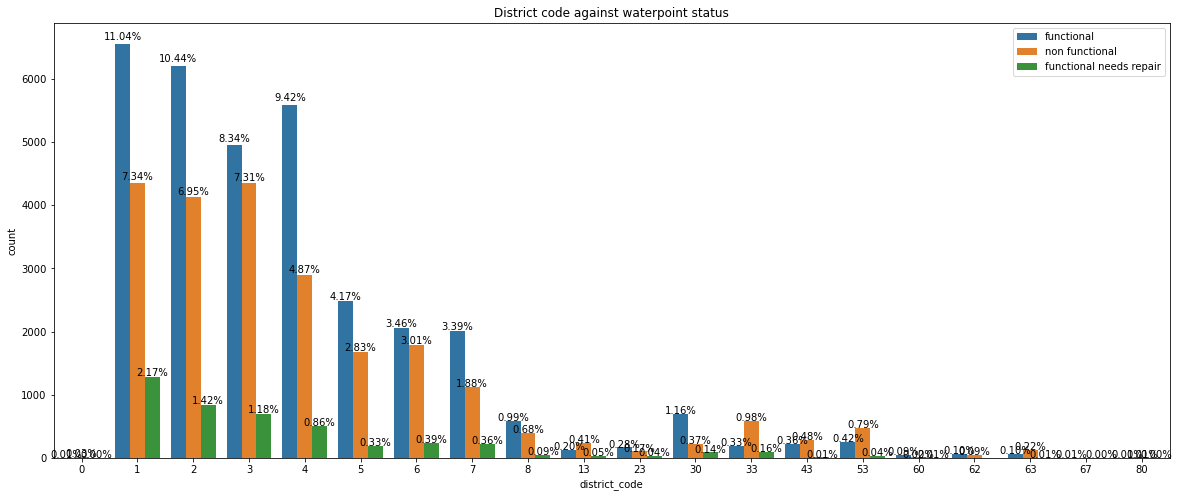

In [51]:
countplot_w_percentage(df, (20, 8), 'district_code', 'status_group', 'District code against waterpoint status', 'upper right')

In [52]:
# Display the instances with district_code of 0
df_temp = df.loc[df['district_code'] == 0, ['id', 'region', 'region_code', 'district_code', 'lga', 'ward']]
df_temp.groupby(['region', 'region_code', 'district_code', 'lga', 'ward'])['id'].count().reset_index()

,region,region_code,district_code,lga,ward,id
0,Dodoma,1,0,Mpwapwa,Gode Gode,5
1,Dodoma,1,0,Mpwapwa,Matomondo,18


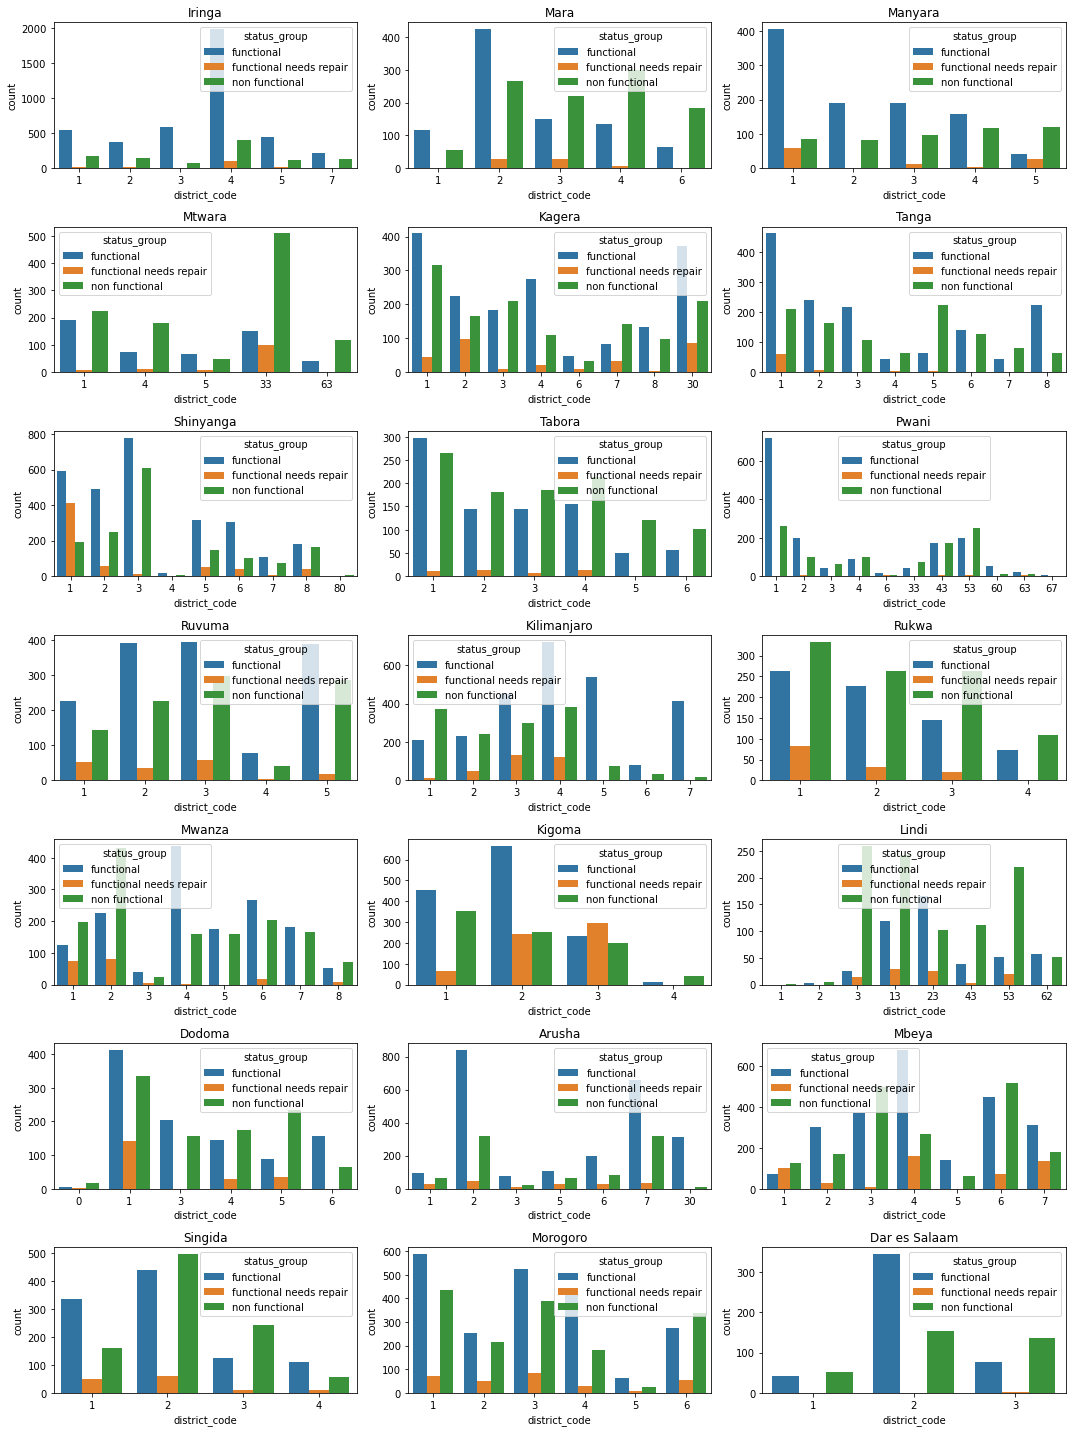

In [53]:
# Visualisation on the district_code correspond to its region
fig, ax = plt.subplots(7, 3, figsize=(15, 20))
ax = ax.ravel()
count = 0

for region in df['region'].unique():
    if df.loc[df['region'] == region, 'district_code'].unique().shape[0] >= 1:
        df_temp = df.loc[df['region'] == region].sort_values(by='status_group')
        sns.countplot(data=df_temp, x='district_code', hue='status_group', ax=ax[count])
        ax[count].set_title(region)
        count += 1
        
plt.tight_layout()
plt.show()

In [54]:
df_temp = df.groupby(['region', 'district_code'])['id'].count().reset_index()

print('Cardinality of region with district_code:', df_temp.shape[0], '\n')
df_temp.head(10)

Cardinality of region with district_code: 132 



,region,district_code,id
0,Arusha,1,189
1,Arusha,2,1206
2,Arusha,3,109
3,Arusha,5,201
4,Arusha,6,310
5,Arusha,7,1009
6,Arusha,30,326
7,Dar es Salaam,1,93
8,Dar es Salaam,2,497
9,Dar es Salaam,3,215


In [55]:
df_temp = df.groupby(['region', 'region_code', 'district_code'])['id'].count().reset_index()

print('Cardinality of region with region_code and district_code:', df_temp.shape[0], '\n')
df_temp.head(10)

Cardinality of region with region_code and district_code: 137 



,region,region_code,district_code,id
0,Arusha,2,1,189
1,Arusha,2,2,1206
2,Arusha,2,3,109
3,Arusha,2,5,201
4,Arusha,2,6,310
5,Arusha,2,7,1009
6,Arusha,24,30,326
7,Dar es Salaam,7,1,93
8,Dar es Salaam,7,2,497
9,Dar es Salaam,7,3,215


#### Observation:
- The majority of district_code range originate from 1 to 8
- Each region could have the same district_code.
- district code by itself is not a strong predictor, but when combined with region, it provides additional information.

#### Notes:
- Convert datatype to int as there doesn't exist a row with decimal point.
- The feature combination of region with district_code is 132 whereas region, region_code with district_code is 137.
- Feature engineering: Create 2 new features by combining region, region_code and district_code or region with district_code and compare their performance.
- Drop region, region_code & district_code after feature engineering.
- Perform feature encoding.
- Granularities (least to greatest): Basin, region, region_code, district_code

### 2.12 lga / ward
- Description: Geographic location
- A local government area (LGA) is an administrative division of a country that a local government is responsible for.
- A ward is an area within a local authority, typically used for electoral purposes.

In [56]:
print('Lga: ', '\n', df['lga'].describe(), '\n')
print('Ward: ', '\n', df['ward'].describe())

Lga:  
 count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object 

Ward:  
 count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object


In [57]:
df['lga'].sort_values().unique()

array(['Arusha Rural', 'Arusha Urban', 'Babati', 'Bagamoyo', 'Bahi',
       'Bariadi', 'Biharamulo', 'Bukoba Rural', 'Bukoba Urban', 'Bukombe',
       'Bunda', 'Chamwino', 'Chato', 'Chunya', 'Dodoma Urban', 'Geita',
       'Hai', 'Hanang', 'Handeni', 'Igunga', 'Ilala', 'Ileje', 'Ilemela',
       'Iramba', 'Iringa Rural', 'Kahama', 'Karagwe', 'Karatu', 'Kasulu',
       'Kibaha', 'Kibondo', 'Kigoma Rural', 'Kigoma Urban', 'Kilindi',
       'Kilolo', 'Kilombero', 'Kilosa', 'Kilwa', 'Kinondoni', 'Kisarawe',
       'Kishapu', 'Kiteto', 'Kondoa', 'Kongwa', 'Korogwe', 'Kwimba',
       'Kyela', 'Lindi Rural', 'Lindi Urban', 'Liwale', 'Longido',
       'Ludewa', 'Lushoto', 'Mafia', 'Magu', 'Makete', 'Manyoni',
       'Masasi', 'Maswa', 'Mbarali', 'Mbeya Rural', 'Mbinga', 'Mbozi',
       'Mbulu', 'Meatu', 'Meru', 'Misenyi', 'Missungwi', 'Mkinga',
       'Mkuranga', 'Monduli', 'Morogoro Rural', 'Morogoro Urban',
       'Moshi Rural', 'Moshi Urban', 'Mpanda', 'Mpwapwa', 'Mtwara Rural',
       'Mtw

In [58]:
# Check the relation between region and lga
for region in df['region'].unique():
    print(region)
    print(df.loc[df['region'] == region, 'lga'].unique())

Iringa
['Ludewa' 'Njombe' 'Kilolo' 'Makete' 'Iringa Rural' 'Mufindi']
Mara
['Serengeti' 'Musoma Rural' 'Bunda' 'Tarime' 'Rorya']
Manyara
['Simanjiro' 'Mbulu' 'Hanang' 'Kiteto' 'Babati']
Mtwara
['Nanyumbu' 'Masasi' 'Mtwara Rural' 'Newala' 'Tandahimba' 'Mtwara Urban']
Kagera
['Karagwe' 'Bukoba Rural' 'Bukoba Urban' 'Muleba' 'Misenyi' 'Chato'
 'Biharamulo' 'Ngara']
Tanga
['Mkinga' 'Muheza' 'Lushoto' 'Korogwe' 'Tanga' 'Handeni' 'Pangani'
 'Kilindi']
Shinyanga
['Shinyanga Rural' 'Kahama' 'Maswa' 'Meatu' 'Bariadi' 'Bukombe' 'Kishapu'
 'Shinyanga Urban']
Tabora
['Tabora Urban' 'Urambo' 'Sikonge' 'Igunga' 'Nzega' 'Uyui']
Pwani
['Mkuranga' 'Bagamoyo' 'Mafia' 'Kibaha' 'Kisarawe' 'Rufiji']
Ruvuma
['Namtumbo' 'Songea Rural' 'Tunduru' 'Mbinga' 'Songea Urban']
Kilimanjaro
['Siha' 'Same' 'Moshi Rural' 'Rombo' 'Moshi Urban' 'Hai' 'Mwanga']
Rukwa
['Sumbawanga Rural' 'Mpanda' 'Nkasi' 'Sumbawanga Urban']
Mwanza
['Ukerewe' 'Geita' 'Sengerema' 'Missungwi' 'Magu' 'Kwimba' 'Ilemela'
 'Nyamagana']
Kigoma
['Ki

In [59]:
print('Number of ward contain instances less than 100:', list(df['ward'].value_counts() < 100).count(True))

Number of ward contain instances less than 100: 2034


#### Observation:
- Similar to above geographical features, a lga can be further distrivute into wards.
- Both features have high cardinality with 125 & 2092.
- Out of 2092 ward, 2034 consist instances less than 100. Prefer lga over ward.

#### Notes:
- A region consist of multiple lga, a lga can be further distribute into wards, a wards consist of multiple subvillage.
- Granularities (least to greatest): Basin, region, region_code, district_code, lga, ward.
- Drop lga & ward feature.

### 2.13 subvillage
- Description: Geographic location

In [60]:
df['subvillage'].describe()

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object

In [61]:
print('Total of NaN in subvillage:', df['subvillage'].isna().sum())

Total of NaN in subvillage: 371


In [62]:
df['subvillage'].value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

In [63]:
print('Number of subvillage that only appears once in the dataset:', list(df['subvillage'].value_counts() == 1).count(True))

Number of subvillage that only appears once in the dataset: 9424


#### Observation:
- 371 missing values.
- Very high cardinality of 19287.
- Majority of the subvillage only appears once or contain one instances in the dataset (9424 out of 19287) and there exist no villages that are dominant in terms of overall count.

#### Notes:
- Drop ward feature.
- Granularities (least to greatest): Basin, region, region_code, district_code, lga, ward, subvillage.

### 2.14 population
- Description: Population around the well

In [64]:
df['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

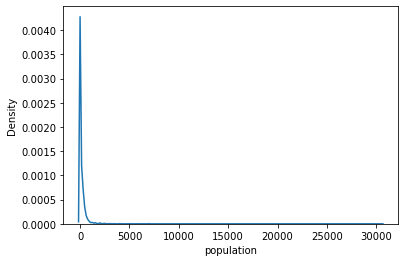

In [65]:
sns.kdeplot(data=df, x='population', fill=False)
plt.show()

In [66]:
df['population'].value_counts(normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
6330    0.000017
5030    0.000017
656     0.000017
948     0.000017
788     0.000017
Name: population, Length: 1049, dtype: float64

#### Observation:
- Approximate 36% of the population are 0, same as above numerical's missing data cases, it is reasonable to assume missing values are encoded as 0.

#### Notes:
- population feature is highly skewed, best to avoid mean imputation method unless outliers were removed.
- Perform imputation.

### 2.15 public_meeting
- Description: True/False

In [67]:
df['public_meeting'].describe()

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object

In [68]:
print('Total of Nan in public_meeting:', df['public_meeting'].isna().sum())

Total of Nan in public_meeting: 3334


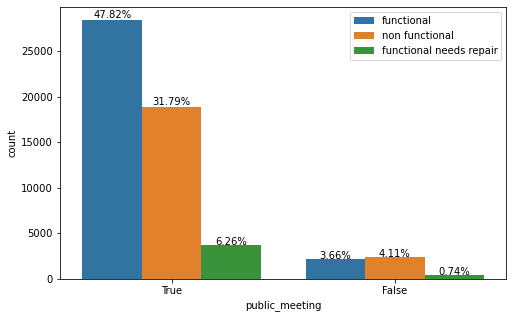

In [69]:
countplot_w_percentage(df, (8, 5), 'public_meeting', 'status_group', '', 'upper right')

#### Observation:
- 3334 missing values.
- Contains high mode percentage, low variance therefore not a good predictor for status_group.
- Waterpump that doesn't have public_meeting have higher non-functional waterpipe as compared to functional.

#### Notes:
- Perform imputation.

### 2.16 recorded_by
- Description: Group entering this row of data

In [70]:
df['recorded_by'].describe()

count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object

#### Notes:
- recorded_by features only contains 1 unique values, therfore no information is provided.
- Drop feature.

### 2.17 management_group / scheme_management
- Description: Who operates the waterpoint / How the waterpoint is managed

In [71]:
print('management_group: ', '\n', df['management_group'].describe(), '\n')
print('scheme_management: ', '\n', df['scheme_management'].describe())

management_group:  
 count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object 

scheme_management:  
 count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object


In [72]:
print(df['scheme_management'].unique())

['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


In [73]:
print('Total Nan in scheme_management:', df['scheme_management'].isna().sum())
print('Total None in scheme_management:', df.loc[df['scheme_management'] == 'None', 'scheme_management'].count())

Total Nan in scheme_management: 3877
Total None in scheme_management: 1


In [74]:
print('Scheme management:')
print(df['scheme_management'].value_counts(normalize=True), '\n')

print('Management group:')
df['management_group'].value_counts(normalize=True)

Scheme management:
VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64 

Management group:


user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64

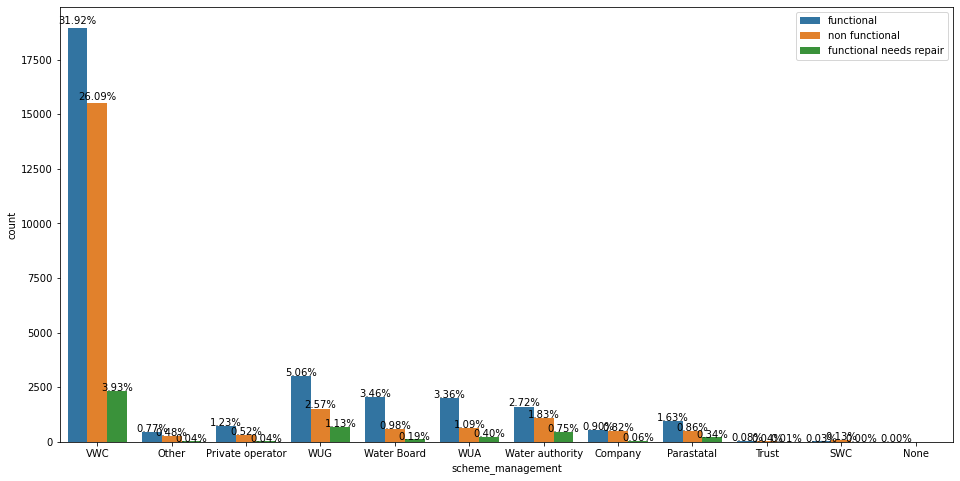

In [75]:
countplot_w_percentage(df, (16, 8), 'scheme_management', 'status_group', '', 'upper right')

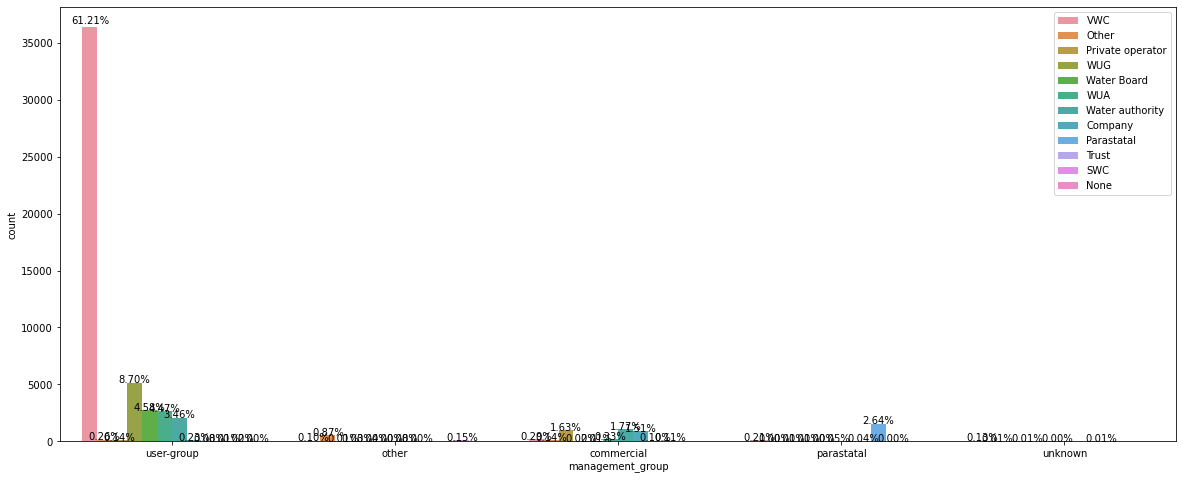

In [76]:
countplot_w_percentage(df, (20, 8), 'management_group', 'scheme_management', '', 'upper right')

#### Observation:
- 3877 missing values, 1 None value.
- Most pumps are managed by VWC.

#### Notes:
- Convert the 'None' value present in scheme_management in Nan value before performing imputation.
- Perform imputation on scheme_management and feature encoding.

### 2.18 management
- Description: How the waterpoint is managed

In [77]:
df['management'].describe()

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object

In [78]:
print("Management's unique value: ")
print(df['management'].sort_values().unique(), '\n')
print("Scheme_management's unique value: ")
print(df['scheme_management'].sort_values().unique())

Management's unique value: 
['company' 'other' 'other - school' 'parastatal' 'private operator'
 'trust' 'unknown' 'vwc' 'water authority' 'water board' 'wua' 'wug'] 

Scheme_management's unique value: 
['Company' 'None' 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust'
 'VWC' 'WUA' 'WUG' 'Water Board' 'Water authority' nan]


In [79]:
df.loc[df['management'] == 'unknown', 'management']

227      unknown
340      unknown
354      unknown
393      unknown
517      unknown
          ...   
59087    unknown
59306    unknown
59310    unknown
59344    unknown
59370    unknown
Name: management, Length: 561, dtype: object

In [80]:
print('Number of NaN value:', df['management'].isna().sum())
print('Number of Unknown value:', df.loc[df['management'] == 'unknown', 'management'].count())
df['management'].value_counts(normalize=True)

Number of NaN value: 0
Number of Unknown value: 561


vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: management, dtype: float64

In [81]:
# Display management & scheme management
df.groupby(['scheme_management', 'management', 'status_group'])['id'].count().reset_index().head(10)

,scheme_management,management,status_group,id
0,Company,company,functional,257
1,Company,company,functional needs repair,15
2,Company,company,non functional,402
3,Company,other,functional,1
4,Company,other,non functional,1
5,Company,parastatal,functional,17
6,Company,parastatal,non functional,8
7,Company,private operator,functional,194
8,Company,private operator,non functional,30
9,Company,vwc,functional,64


In [82]:
df.groupby(['management_group', 'management', 'status_group'])['id'].count().reset_index().head(10)

,management_group,management,status_group,id
0,commercial,company,functional,267
1,commercial,company,functional needs repair,15
2,commercial,company,non functional,403
3,commercial,private operator,functional,1476
4,commercial,private operator,functional needs repair,44
5,commercial,private operator,non functional,451
6,commercial,trust,functional,46
7,commercial,trust,functional needs repair,6
8,commercial,trust,non functional,26
9,commercial,water authority,functional,446


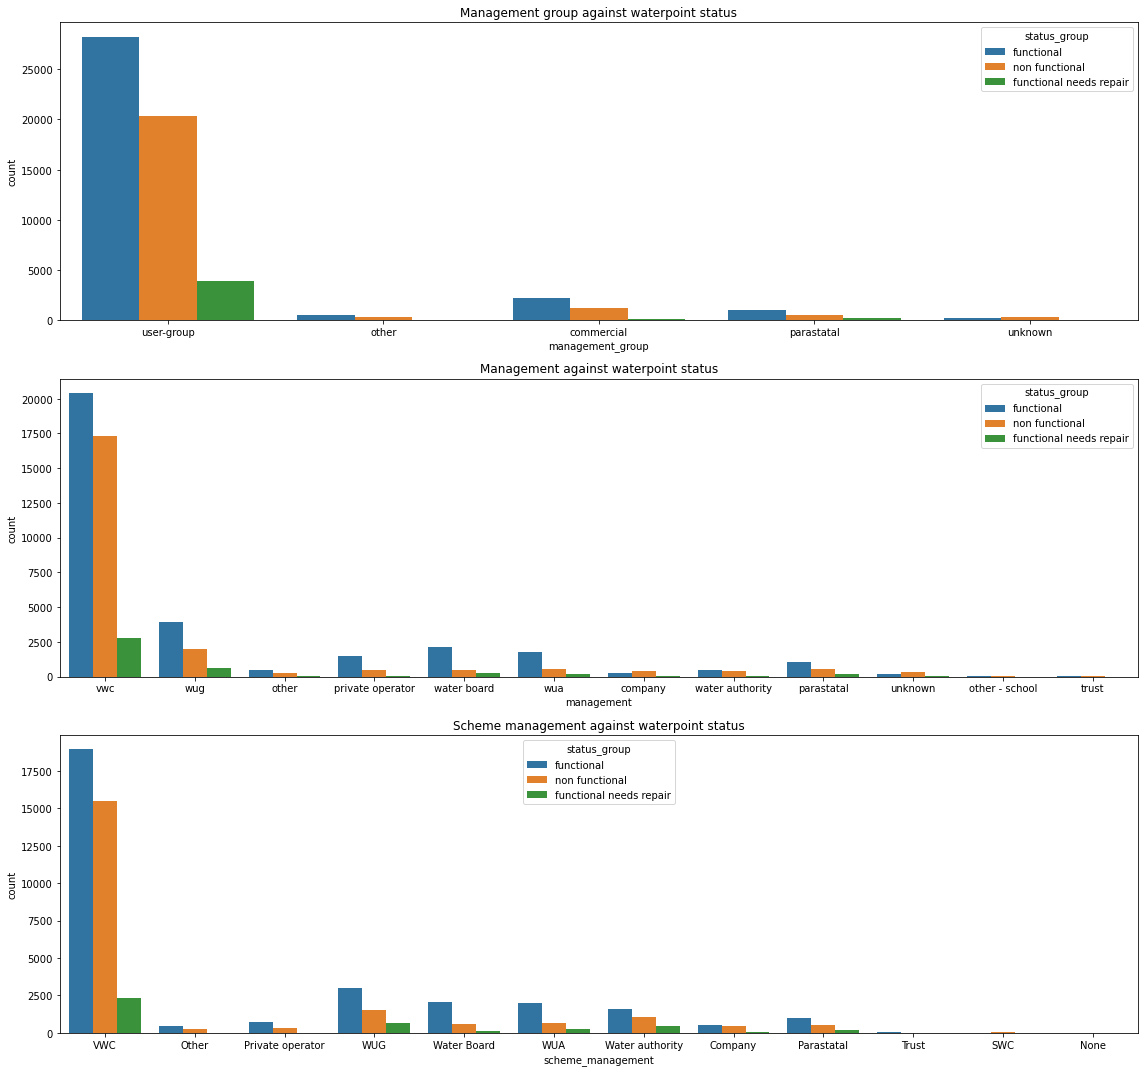

In [83]:
fig, ax = plt.subplots(3, 1, figsize=(16, 15))
sns.countplot(data=df, x='management_group', hue='status_group', ax=ax[0])
ax[0].set_title('Management group against waterpoint status')
sns.countplot(data=df, x='management', hue='status_group', ax=ax[1])
ax[1].set_title('Management against waterpoint status')
sns.countplot(data=df, x='scheme_management', hue='status_group', ax=ax[2])
ax[2].set_title('Scheme management against waterpoint status')
plt.tight_layout()
plt.show()

#### Observation:
- management has the same cardinality as scheme_management and contain very similar values.
- The relationship between management and scheme_mangement are not clear.
- management_group provide the least information out of the 3 management features (management_group, scheme_management & management)

#### Notes:
- Drop management_group.

### 2.19 scheme_name
- Description: Who operates the waterpoint

In [84]:
df['scheme_name'].describe()

count     31234
unique     2696
top           K
freq        682
Name: scheme_name, dtype: object

In [85]:
print('Number of NaN value:', df['scheme_name'].isna().sum())

Number of NaN value: 28166


#### Observation:
- scheme_name has high cardinality.
- Nearly half of the values are missing.

#### Notes: 
- Drop the column.

### 2.20 permit
- Description: If the waterpoint is permitted

In [86]:
df['permit'].describe()

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object

In [87]:
print(df['permit'].isna().sum())

3056


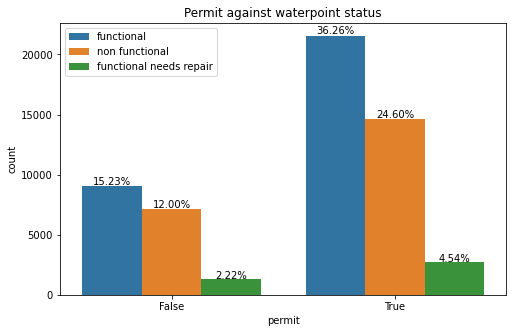

In [88]:
countplot_w_percentage(df, (8, 5), 'permit', 'status_group', 'Permit against waterpoint status', 'upper left')

#### Observation:
- 3056 missing values.
- permit would not be a significant predictor for status_group of the waterpoint.

#### Notes:
- Perform imputation and feature encoding.

### 2.21 construction_year
- Description: Year the waterpoint was constructed

In [89]:
df['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [90]:
df['construction_year'].value_counts(normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [91]:
for year in df['construction_year'].sort_values().unique():
    print('Year:', year)
    for status in df['status_group'].unique():
        value = round(df.loc[(df['construction_year'] == year) & (df['status_group'] == status), 'status_group'].count().sum() / df.loc[(df['construction_year'] == year), 'status_group'].count().sum() * 100)
        print(status, ':', value, '%')
    print('\n')

Year: 0
functional : 51 %
non functional : 40 %
functional needs repair : 9 %


Year: 1960
functional : 24 %
non functional : 71 %
functional needs repair : 6 %


Year: 1961
functional : 10 %
non functional : 76 %
functional needs repair : 14 %


Year: 1962
functional : 23 %
non functional : 73 %
functional needs repair : 3 %


Year: 1963
functional : 36 %
non functional : 56 %
functional needs repair : 7 %


Year: 1964
functional : 18 %
non functional : 80 %
functional needs repair : 2 %


Year: 1965
functional : 58 %
non functional : 37 %
functional needs repair : 5 %


Year: 1966
functional : 35 %
non functional : 65 %
functional needs repair : 0 %


Year: 1967
functional : 35 %
non functional : 45 %
functional needs repair : 19 %


Year: 1968
functional : 29 %
non functional : 66 %
functional needs repair : 5 %


Year: 1969
functional : 25 %
non functional : 69 %
functional needs repair : 5 %


Year: 1970
functional : 24 %
non functional : 72 %
functional needs repair : 4 %


Year:

#### Observation:
- 34% missing values.
- Pumps constructed in recent years are more likely to be functional.

#### Notes:
- Important features.
- Imputation

### 2.22 extraction_type_class / extraction_type_group / extraction_type
- Description: The kind of extraction the waterpoint uses

In [92]:
print(df['extraction_type_class'].describe())
print(df['extraction_type_group'].describe())
print(df['extraction_type'].describe())

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object
count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object
count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object


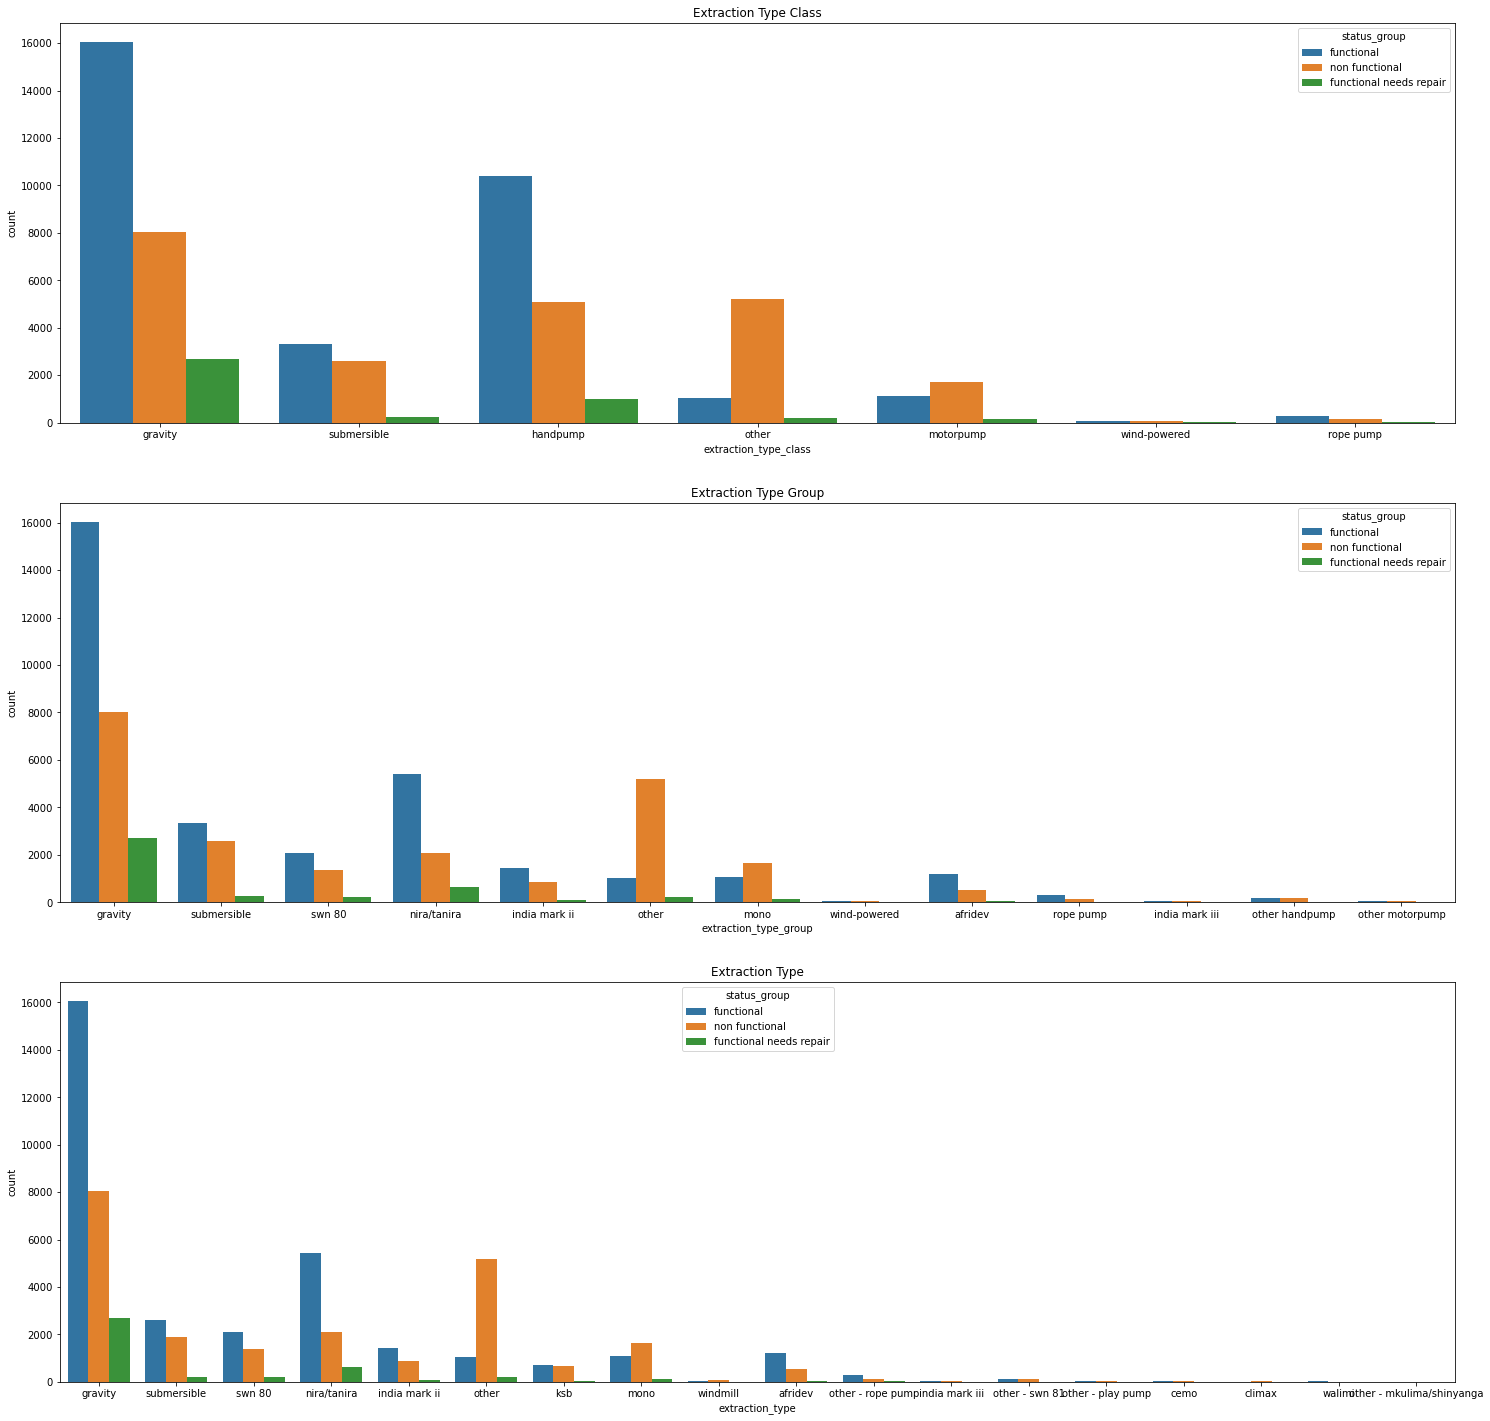

In [93]:
fig, ax = plt.subplots(3, 1, figsize=(25, 25))
sns.countplot(data=df, x='extraction_type_class', hue='status_group', ax=ax[0])
ax[0].set_title('Extraction Type Class')
sns.countplot(data=df, x='extraction_type_group', hue='status_group', ax=ax[1])
ax[1].set_title('Extraction Type Group')
sns.countplot(data=df, x='extraction_type', hue='status_group', ax=ax[2])
ax[2].set_title('Extraction Type')
plt.show()

In [94]:
# Display the combination of extraction_type_class, extraction_type_group & extraction_type with respect to its count in the 'id' column
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type', 'status_group'])['id'].count().reset_index()

,extraction_type_class,extraction_type_group,extraction_type,status_group,id
0,gravity,gravity,gravity,functional,16048
1,gravity,gravity,gravity,functional needs repair,2701
2,gravity,gravity,gravity,non functional,8031
3,handpump,afridev,afridev,functional,1200
4,handpump,afridev,afridev,functional needs repair,42
5,handpump,afridev,afridev,non functional,528
6,handpump,india mark ii,india mark ii,functional,1448
7,handpump,india mark ii,india mark ii,functional needs repair,79
8,handpump,india mark ii,india mark ii,non functional,873
9,handpump,india mark iii,india mark iii,functional,44


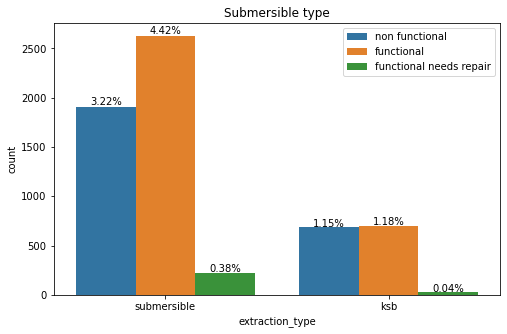

In [95]:
# Visualize the extraction_type for submersible and ksb
df_temp = df.loc[df['extraction_type_group'] == 'submersible']

countplot_w_percentage(df_temp, (8, 5), 'extraction_type', 'status_group', 'Submersible type', 'upper right')

#### Observation:
- extraction_type provide a little more useful information than extraction_type_group.
- Each of extraction_type_class is divided into multiple extraction_type_group and each source type is further divided into extraction_type.
- extraction_type_class -> extraction_type_group -> extraction_type

#### Notes:
- Drop extraction_type_class & extraction_type_group feature.
- Perform feature encoding.

### 2.23 payment / payment_type
- Description: What the water costs

In [96]:
print(df['payment'].describe())
print(df['payment_type'].describe())

count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object
count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object


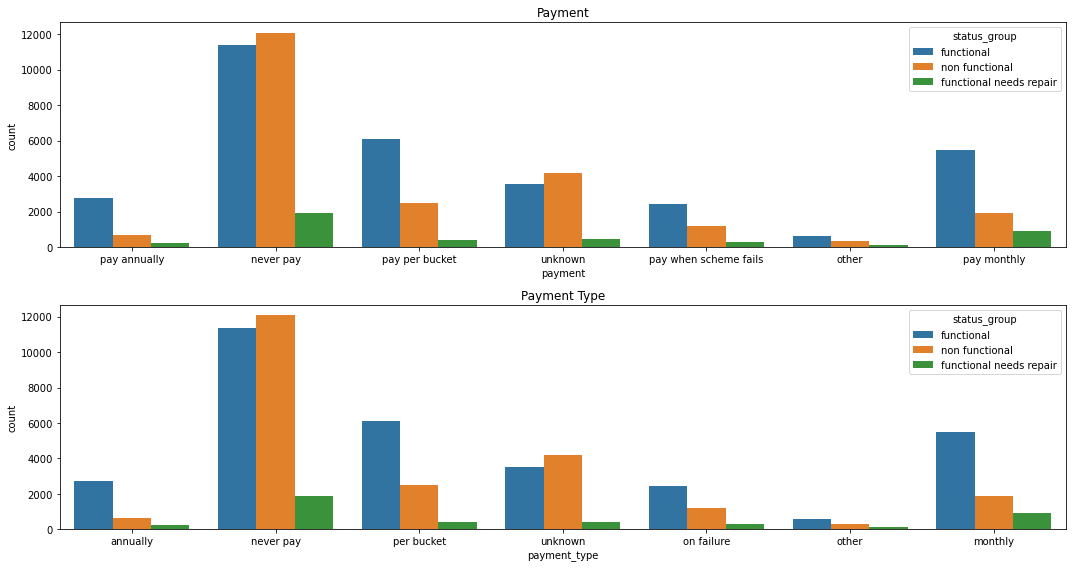

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
sns.countplot(data=df, x='payment', hue='status_group', ax=ax[0])
ax[0].set_title('Payment')
sns.countplot(data=df, x='payment_type', hue='status_group', ax=ax[1])
ax[1].set_title('Payment Type')
plt.tight_layout()
plt.show()

In [98]:
# Display the combination of payment and payment_type with respect to its count in the 'id' column
df.groupby(['payment', 'payment_type'])['id'].count().reset_index()

,payment,payment_type,id
0,never pay,never pay,25348
1,other,other,1054
2,pay annually,annually,3642
3,pay monthly,monthly,8300
4,pay per bucket,per bucket,8985
5,pay when scheme fails,on failure,3914
6,unknown,unknown,8157


#### Observation:
- Pump involves payment are likely to be functional.

#### Notes:
- payment & payment_type contain the exact values, therefore either 1 can be drop.

### 2.24 water_quality / quality_group
- Description: The quality of the water

In [99]:
print(df['water_quality'].describe())
print(df['quality_group'].describe())

count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object
count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object


In [100]:
print('Unique value for water quality:', df['water_quality'].sort_values().unique())
print('Unique value for quality group:', df['quality_group'].sort_values().unique())

Unique value for water quality: ['coloured' 'fluoride' 'fluoride abandoned' 'milky' 'salty'
 'salty abandoned' 'soft' 'unknown']
Unique value for quality group: ['colored' 'fluoride' 'good' 'milky' 'salty' 'unknown']


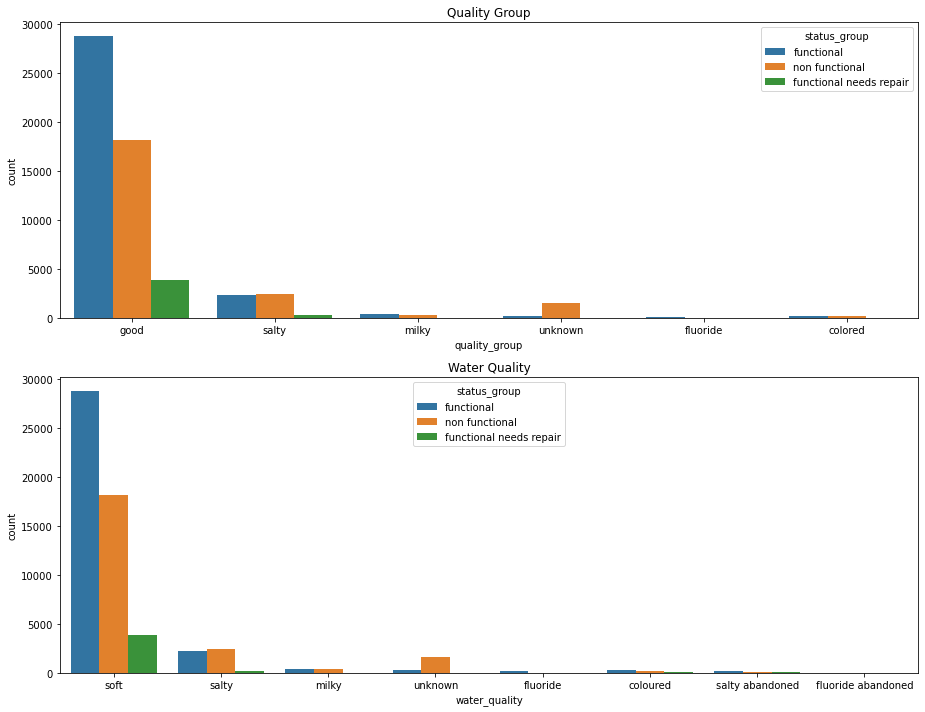

In [101]:
fig, ax = plt.subplots(2, 1, figsize=(13, 10))
sns.countplot(data=df, x='quality_group', hue='status_group', ax=ax[0])
ax[0].set_title('Quality Group')
sns.countplot(data=df, x='water_quality', hue='status_group', ax=ax[1])
ax[1].set_title('Water Quality')
plt.tight_layout()
plt.show()

In [102]:
# Display the combination quality_group & water_quality with respect to its count in the 'id' column
df.groupby(['quality_group', 'water_quality'])['id'].count().reset_index()

,quality_group,water_quality,id
0,colored,coloured,490
1,fluoride,fluoride,200
2,fluoride,fluoride abandoned,17
3,good,soft,50818
4,milky,milky,804
5,salty,salty,4856
6,salty,salty abandoned,339
7,unknown,unknown,1876


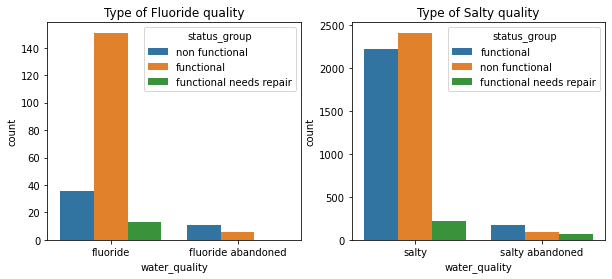

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# View the water quality with clear scale on the y-axis
df_temp_fluoride = df.loc[(df['quality_group'] == 'fluoride')]
df_temp_salty = df.loc[(df['quality_group'] == 'salty')]

sns.countplot(data=df_temp_fluoride, x='water_quality', hue='status_group', ax=ax[0])
ax[0].set_title('Type of Fluoride quality')
sns.countplot(data=df_temp_salty, x='water_quality', hue='status_group', ax=ax[1])
ax[1].set_title('Type of Salty quality')
plt.show()

#### Observation:
- water_quality contains 8 unique value while quality group contains 6.
- water_quality provide more information as compared to quality_group, e.g. the functional class of fluoride is significantly higher than fluoride abandoned.
- Hierachical Relationship: The only difference is fluoride & salty in quality_group contain subgroup fluoride, fluoride abandoned & salty, salty abandoned.

#### Notes:
- Drop quality_group feature.
- Perform feature encoding.

### 2.25 quantity / quantity_group
- Description: The quantity of water

In [104]:
print(df['quantity'].describe())
print(df['quantity_group'].describe())

count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object
count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object


In [105]:
print('Unique value for water quantity:', df['quantity'].sort_values().unique())
print('Unique value for quantity group:', df['quantity_group'].sort_values().unique())

Unique value for water quantity: ['dry' 'enough' 'insufficient' 'seasonal' 'unknown']
Unique value for quantity group: ['dry' 'enough' 'insufficient' 'seasonal' 'unknown']


In [106]:
# Display the combination of quantity, quantity_group & status_group with respect to its count in the 'id' column
df.groupby(['quantity', 'quantity_group', 'status_group'])['id'].count().reset_index()

,quantity,quantity_group,status_group,id
0,dry,dry,functional,157
1,dry,dry,functional needs repair,37
2,dry,dry,non functional,6052
3,enough,enough,functional,21648
4,enough,enough,functional needs repair,2400
5,enough,enough,non functional,9138
6,insufficient,insufficient,functional,7916
7,insufficient,insufficient,functional needs repair,1450
8,insufficient,insufficient,non functional,5763
9,seasonal,seasonal,functional,2325


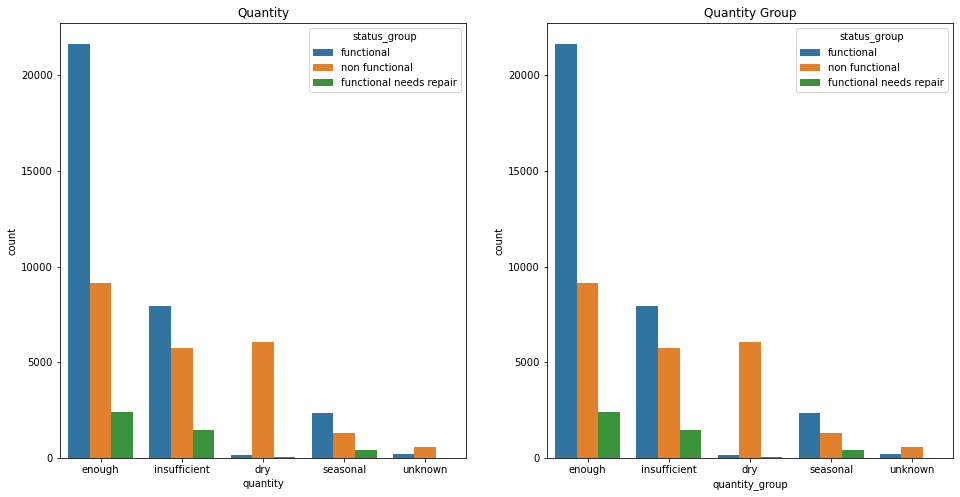

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(data=df, x='quantity', hue='status_group', ax=ax[0])
ax[0].set_title('Quantity')
sns.countplot(data=df, x='quantity_group', hue='status_group', ax=ax[1])
ax[1].set_title('Quantity Group')
plt.show()

#### Observation:
- Dry pumps are always non functional.

#### Notes:
- quantity & quantity_group capture the same information, therefore either 1 can be drop.
- Perform feature encoding.

### 2.26 source_class / source_type / source 
- Description: The source of the water

In [108]:
print('source_class: ', '\n', df['source_class'].describe(), '\n')
print('source_type: ', '\n', df['source_type'].describe(), '\n')
print('source: ', '\n', df['source'].describe(), '\n')

source_class:  
 count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object 

source_type:  
 count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object 

source:  
 count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object 



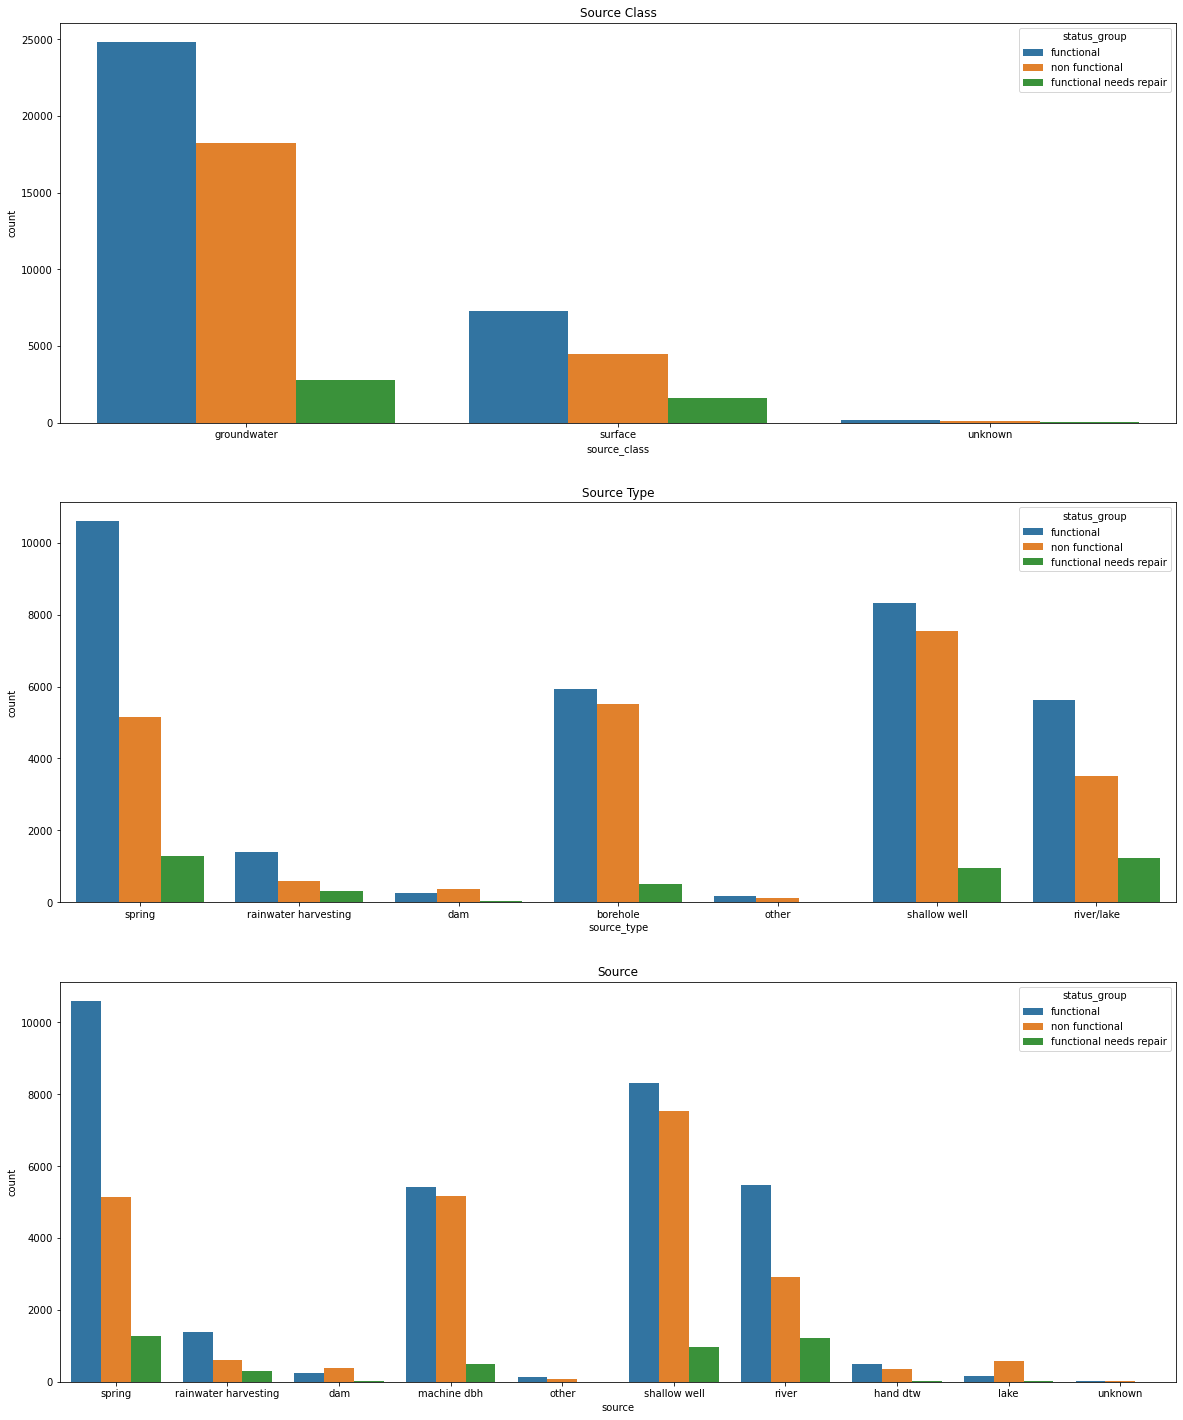

In [109]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
sns.countplot(data=df, x='source_class', hue='status_group', ax=ax[0])
ax[0].set_title('Source Class')
sns.countplot(data=df, x='source_type', hue='status_group', ax=ax[1])
ax[1].set_title('Source Type')
sns.countplot(data=df, x='source', hue='status_group', ax=ax[2])
ax[2].set_title('Source')
plt.show()

In [110]:
# Display the combination of source, source_type & source_class with respect to its count in the 'id' column
df.groupby(['source_class', 'source_type', 'source'])['id'].count().reset_index()

,source_class,source_type,source,id
0,groundwater,borehole,hand dtw,874
1,groundwater,borehole,machine dbh,11075
2,groundwater,shallow well,shallow well,16824
3,groundwater,spring,spring,17021
4,surface,dam,dam,656
5,surface,rainwater harvesting,rainwater harvesting,2295
6,surface,river/lake,lake,765
7,surface,river/lake,river,9612
8,unknown,other,other,212
9,unknown,other,unknown,66


#### Observation:
- Each of source_class is divided into multiple source_type and each source type is further divided into multiple source.
- Granularity (least to greatest): source_class -> source_type -> source
- source_type & source provide more info than source_class.
- The distinct classes for river and lake distribution on source give more information than the river/lake combination on source type.

#### Notes:
- Drop source_class, source_type feature.
- Perform feature encoding.

### 2.27 waterpoint_type / waterpoint_type_group
- Description: The kind of waterpoint

In [111]:
print('waterpoint_type: ', '\n', df['waterpoint_type'].describe(), '\n')
print('waterpoint_type_group', '\n', df['waterpoint_type_group'].describe(), '\n')

waterpoint_type:  
 count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object 

waterpoint_type_group 
 count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object 



In [112]:
print('Total unique value for waterpoint type:', '\n', df['waterpoint_type'].sort_values().unique(), '\n')
print('Total unique value for waterpoint type group:', '\n', df['waterpoint_type_group'].sort_values().unique())

Total unique value for waterpoint type: 
 ['cattle trough' 'communal standpipe' 'communal standpipe multiple' 'dam'
 'hand pump' 'improved spring' 'other'] 

Total unique value for waterpoint type group: 
 ['cattle trough' 'communal standpipe' 'dam' 'hand pump' 'improved spring'
 'other']


In [113]:
# Display the combination waterpoint_type, waterpoint_type_group and status_group with respect to its count in the 'id' column
df.groupby(['waterpoint_type_group', 'waterpoint_type', 'status_group'])['id'].count().reset_index()

,waterpoint_type_group,waterpoint_type,status_group,id
0,cattle trough,cattle trough,functional,84
1,cattle trough,cattle trough,functional needs repair,2
2,cattle trough,cattle trough,non functional,30
3,communal standpipe,communal standpipe,functional,17726
4,communal standpipe,communal standpipe,functional needs repair,2260
5,communal standpipe,communal standpipe,non functional,8536
6,communal standpipe,communal standpipe multiple,functional,2235
7,communal standpipe,communal standpipe multiple,functional needs repair,648
8,communal standpipe,communal standpipe multiple,non functional,3220
9,dam,dam,functional,6


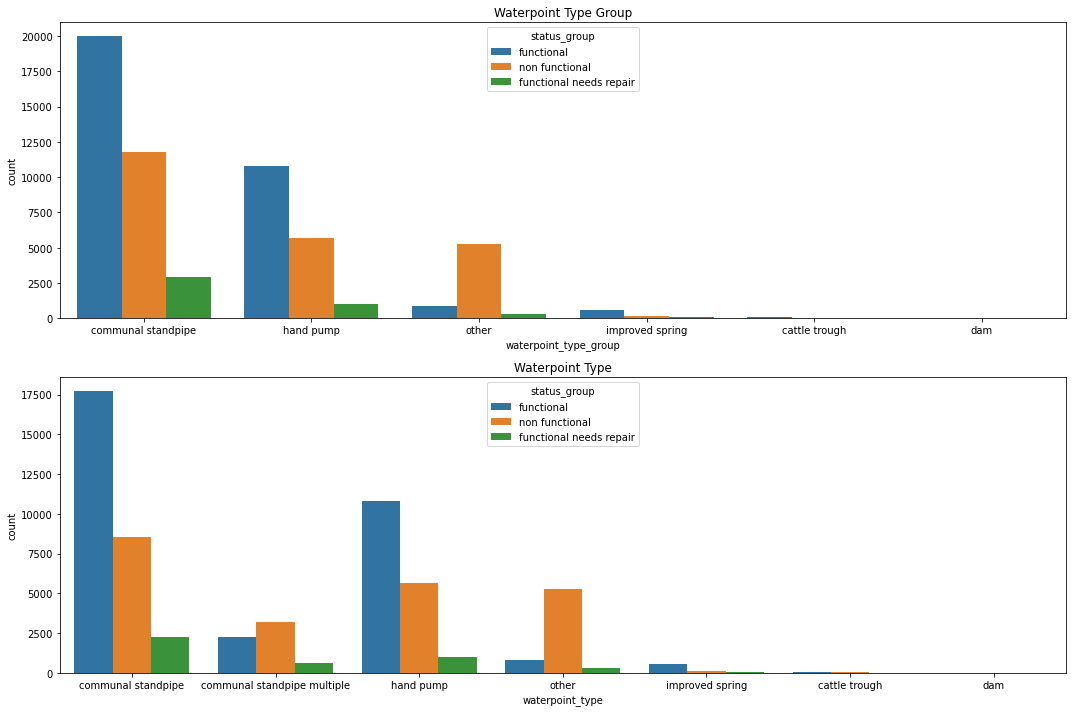

In [114]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.countplot(data=df, x='waterpoint_type_group', hue='status_group', ax=ax[0])
ax[0].set_title('Waterpoint Type Group')
sns.countplot(data=df, x='waterpoint_type', hue='status_group', ax=ax[1])
ax[1].set_title('Waterpoint Type')
plt.tight_layout()
plt.show()

#### Observation:
- waterpoint_type contains 7 unique value while waterpoint_type_group contains 6.
- The only difference is communal standpipe in waterpoint_type is further distributed into communal standpipe & communal standpipe multiple.
- communical standpipe multiple's has higher non functional count as compared to communal standpipe.

#### Notes:
- Drop waterpoint_type_group feature.
- Perform feature encoding.

## 3. Bulk Visualization: Features against waterpoint status

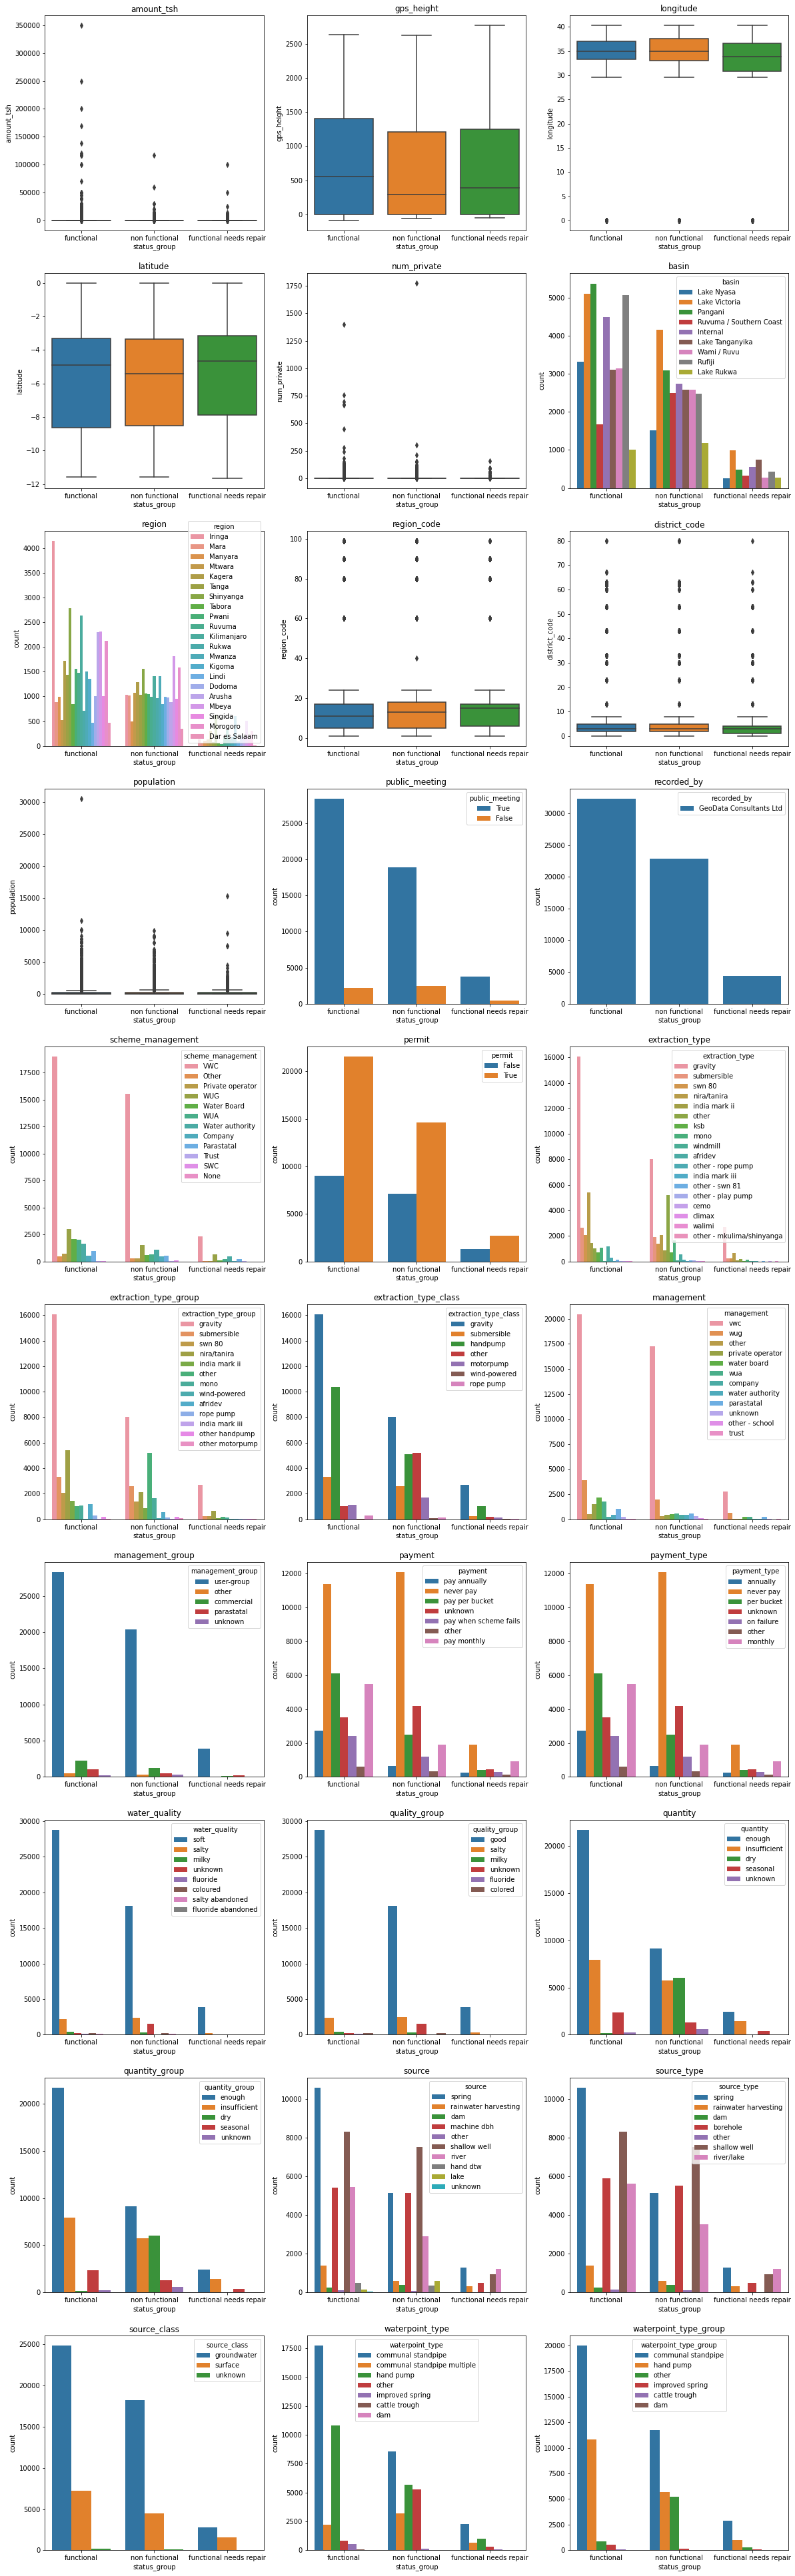

In [115]:
import math

excluded_columns = ['id', 'date_recorded', 'wpt_name', 'subvillage', 'installer', 'funder', 'lga', 'ward', 'scheme_name', 'construction_year', 'status_group']
included_columns_count = df.shape[1] - len(excluded_columns)
num_column = 3
num_row = math.ceil(included_columns_count / num_column)
fig, ax = plt.subplots(num_row, num_column, figsize=(20, 70))
ax = ax.ravel()
count = 0

for column in df.iloc[:, 1:-1]:
    if column in excluded_columns:
        continue;
    elif df[column].dtype == 'float64' or df[column].dtype == 'int64':
        sns.boxplot(data=df, x='status_group', y=column, ax=ax[count])
        ax[count].set_title(column)
        count += 1
    elif df[column].dtype == 'object':
        sns.countplot(data=df, x='status_group', hue=column, ax=ax[count])
        ax[count].set_title(column)
        count += 1
    
plt.show()

## 4. Summary of Feature Analysis

- Missing data are usually encoded as 0.
- Granualarities of geographical features could be utilize to impute features related location. Such features include latitude, longitude, population.

Features to drop:
- id
- wpt_name ➝ Free text (high cadinality and most of the pump doesn't have a name)
- subvillage ➝ Very high cardinality of 19287 and there is no obvious subvillages that standout.
- lga & ward ➝ Prefer region
- num_private ➝ 99% of the value is 0
- recorded_by ➝ Only 1 value
- management_group ➝ Provide the least information among the management features.
- scheme_name ➝ 28166 missing values
- extraction_type_class & extraction_type_group ➝ prefer extraction_type feature which provide more information
- payment_type ➝ Identical column to payment
- quality_group ➝ water_quality provide more information
- quantity_group ➝ Identical column to quantity
- source_class ➝ Didn't provide much information
- souce_type ➝ source provide more useful information than source_type
- waterpoint_type_group ➝ waterpoint_type provide more info
- region ➝ region_code provide more information than region
- region_code & district_code ➝ after feature engineering.
- date_recorded ➝ after feature engineering.
- amount_tsh ➝ after feature engineering.

Granularities (least to greatest):
- source_class -> souce_type -> source
- management_group -> management
- basin -> region -> region_code -> district_code -> lga -> ward -> subvillage
- extraction_type_class -> extration_type_group -> extraction_type


Feature engineering:
- Create missing total static head, 1 represent missing static head (0 from amount_tsh) while 0 represent values other than 0 from amount_tsh.
- Create a new feature from date_recorded to reduce the cardinality of the feature.
- Create a regioin_code_district_code which combines 'region', 'region_code' & 'district_code'.

## 5. Post Analysis on Missing Data
Types of missing data:
- Missing Completely at Random (MCAR)
- Missing at Random (MAR)
- Missing Not at Random (MNAR)

In [116]:
# Create a copy of the dataframe
df_missing = df.copy()

numerical_missing_columns = ['amount_tsh', 'gps_height', 'longitude', 'num_private', 
                             'population', 'construction_year']

# Replace feature missing values' representation with 'nan'
df_missing.loc[df_missing['gps_height'] < 0, 'gps_height'] = 0
df_missing[numerical_missing_columns] = df_missing[numerical_missing_columns].replace(0, np.nan)
df_missing['latitude'].replace(-2.000000e-08, np.nan, inplace=True)
df_missing['funder'].replace(0, np.nan, inplace=True)
df_missing['funder'].replace('None', np.nan, inplace=True)
df_missing['installer'].replace(0, np.nan, inplace=True)
df_missing['installer'].replace('-', np.nan, inplace=True)
df_missing['scheme_management'].replace('none', np.nan, inplace=True)

contain_unknown_columns = ['management', 'management_group', 'payment', 'payment_type', 
                           'water_quality', 'quality_group', 'quantity', 'quantity_group', 
                           'source_class', 'source']

df_missing[contain_unknown_columns] = df_missing[contain_unknown_columns].replace('unknown', np.nan)

In [117]:
# Missing Data in descending order
df_missing.isnull().sum().sort_values(ascending=False)

num_private              58643
amount_tsh               41639
scheme_name              28166
gps_height               21934
population               21381
construction_year        20709
payment_type              8157
payment                   8157
scheme_management         3877
installer                 3658
funder                    3637
public_meeting            3334
permit                    3056
water_quality             1876
quality_group             1876
latitude                  1812
longitude                 1812
quantity_group             789
quantity                   789
management_group           561
management                 561
subvillage                 371
source_class               278
source                      66
source_type                  0
waterpoint_type              0
waterpoint_type_group        0
id                           0
extraction_type_class        0
extraction_type_group        0
extraction_type              0
recorded_by                  0
ward    

<AxesSubplot:>

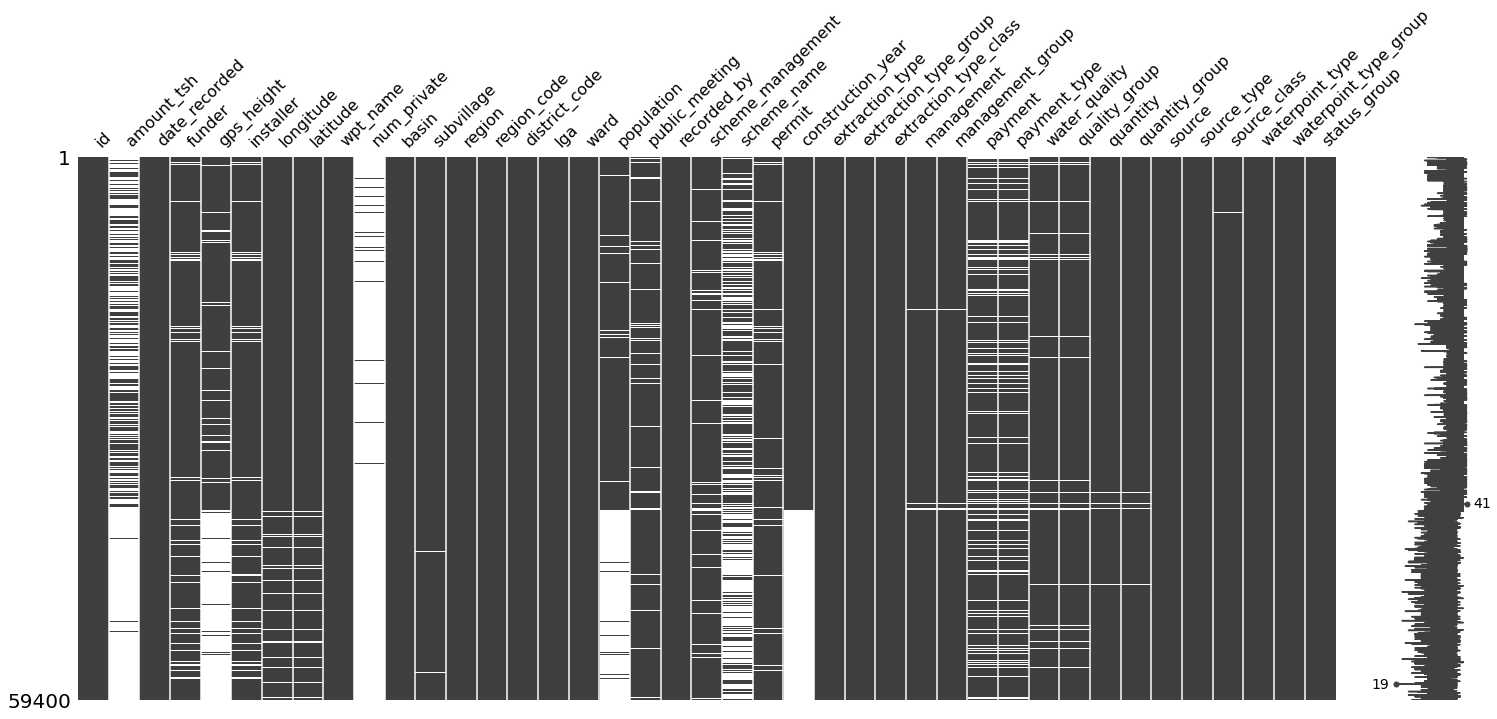

In [118]:
# Sort the dataframe via construction_year
df_sorted = df_missing.sort_values('construction_year')
msno.matrix(df_sorted)

### Notes on post missing data analysis:
- A vague pattern present in the missing values for **gps_height**, **population** and **construction_year**.
- A clear relation is shown between the missing data between (**longitude** & **latitude**) where the missing data of occurs simultaneously on both latitude and longitude. Similarly, a strong relationship of missing data are present for (**funder** & **installer**), (**management**, **management_group**) and (**water_quality** & **quality_group**).
- Duplicate feature such as (**payment** & **payment_type**) and (**quantity** & **quantity_group**) have the same relation on missing data.
- Other features' missing data seems to be missing at random (MAR).